# Исследование данных интернет магазина видео-игр с целью планирования рекламных компаний

**Цель исследования**

Необходимо провести анализ данных, выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) за 2016 год. Данные могут быть неполными.  

Мы будем работать с данными из следующего файла:
- /datasets/games.csv,
где:
  - Name — название игры;
  - Platform — платформа;
  - Year_of_Release — год выпуска;
  - Genre — жанр игры;
  - NA_sales — продажи в Северной Америке (миллионы проданных копий);
  - EU_sales — продажи в Европе (миллионы проданных копий);
  - JP_sales — продажи в Японии (миллионы проданных копий);
  - Other_sales — продажи в других странах (миллионы проданных копий);
  - Critic_Score — оценка критиков (максимум 100);
  - User_Score — оценка пользователей (максимум 10);
  - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр, оценивает игровой контент и присваивает им подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
 
О качестве данных ничего не известно. Поэтому перед исследованием данных понадобится их обзор.

**Ход исследования**

Изучим общую информацию о датасетах. Что можно сказать о каждом столбце? Значения какого типа они хранят? 

Проверим данные на ошибки, и оценим их влияние на исследование, затем, на этапе предобработки, изучим возможность исправить самые критичные ошибки в данных.

Далее проведем необходимые вычисления, на основании которых проанализируем данные и, таким образом, исследование пройдёт в 6 этапов:

- [Загрузка и базовый анализ данных.](#1)
- [Предобработка данных.](#2)
- [Исследовательский анализ данных.](#3)
- [Составление портрета пользователей каждого региона.](#4)
- [Проверка гипотез.](#5)
- [Общий вывод.](#6)

<a id="1"></a>

## Загрузка и обзор данных

In [1]:
#!pip install phik

In [2]:
# Импорт библиотек
import pandas as pd
import numpy as np
import os
from scipy import stats as st
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import phik
from sklearn.preprocessing import LabelEncoder
import warnings

In [3]:
# Игнорирование предупреждений
warnings.filterwarnings('ignore', category=UserWarning, module='phik')

warnings.filterwarnings('ignore', category=RuntimeWarning)

In [4]:
# Ограничиваем вывод числовых значений четырьмя знаками после запятой
pd.options.display.float_format = '{:,.4f}'.format

In [5]:
# Чтение файлa
path = '/Users/marina/CSV_files/games.csv'

if os.path.exists(path):
    games = pd.read_csv(path)   

else:
    print('Something is wrong')

In [6]:
# Выводим основную информацию по датасету games
display(games.head(10))
print()
games.info()
print()
print('Самая часто встречающаяся игра:', games['Name'].mode())
print()
print('Самая часто встречающаяся платформа:', games['Platform'].mode())
print()
print('Самый часто встречающийся жанр:', games['Genre'].mode())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.0000",Sports,41.3600,28.9600,3.7700,8.4500,76.0000,8,E
1,Super Mario Bros.,NES,"1,985.0000",Platform,29.0800,3.5800,6.8100,0.7700,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.0000",Racing,15.6800,12.7600,3.7900,3.2900,82.0000,8.3,E
3,Wii Sports Resort,Wii,"2,009.0000",Sports,15.6100,10.9300,3.2800,2.9500,80.0000,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.0000",Role-Playing,11.2700,8.8900,10.2200,1.0000,NaN,NaN,NaN
5,Tetris,GB,"1,989.0000",Puzzle,23.2000,2.2600,4.2200,0.5800,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.0000",Platform,11.2800,9.1400,6.5000,2.8800,89.0000,8.5,E
7,Wii Play,Wii,"2,006.0000",Misc,13.9600,9.1800,2.9300,2.8400,58.0000,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.0000",Platform,14.4400,6.9400,4.7000,2.2400,87.0000,8.4,E
9,Duck Hunt,NES,"1,984.0000",Shooter,26.9300,0.6300,0.2800,0.4700,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Самая часто встречающаяся игра: 0    Need for Speed: Most Wanted
Name: Name, dtype: object

Самая часто встречающаяся платформа: 0    PS2
Name: Platform, dtype: object

Самый часто встречающийся жанр: 0    Action
Name: Genre, dtype: object

В датасете games 11 столбцов, 16715 строк.

Согласно документации к данным:
- Name — название игры;
- Platform — платформа;
- Year_of_Release — год выпуска;
- Genre — жанр игры;
- NA_sales — продажи в Северной Америке (миллионы проданных копий);
- EU_sales — продажи в Европе (миллионы проданных копий);
- JP_sales — продажи в Японии (миллионы проданных копий);
- Other_sales — продажи в других странах (миллионы проданных копий);
- Critic_Score — оценка критиков (максимум 100);
- User_Score — оценка пользователей (максимум 10);
- Rating — рейтинг от организации ESRB.

Необходимо поменять тип данных в столбце "Year_of_Realease", скорее всего, на integer, в столбце "Critic_Score" на integer, в столбце "User_Score" на float и привести названия столбцов к нижнему регистру.

In [7]:
# Выводим статистическое описание данных
display(games.describe())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.0000","16,715.0000","16,715.0000","16,715.0000","16,715.0000","8,137.0000"
mean,"2,006.4846",0.2634,0.1451,0.0776,0.0473,68.9677
std,5.8770,0.8136,0.5033,0.3089,0.1867,13.9382
min,"1,980.0000",0.0000,0.0000,0.0000,0.0000,13.0000
25%,"2,003.0000",0.0000,0.0000,0.0000,0.0000,60.0000
50%,"2,007.0000",0.0800,0.0200,0.0000,0.0100,71.0000
75%,"2,010.0000",0.2400,0.1100,0.0400,0.0300,79.0000
max,"2,016.0000",41.3600,28.9600,10.2200,10.5700,98.0000


На данном этапе я бы сказала, что наверняка есть выбросы, так как стандартное отклонение по всем столбцам сильно отличается от среднего. Также можно сказать, что Северная Америка лидирует по продажам игр. Минимальный год выпуска игры по нашим данным - 1985, максимальный - 2016ый.

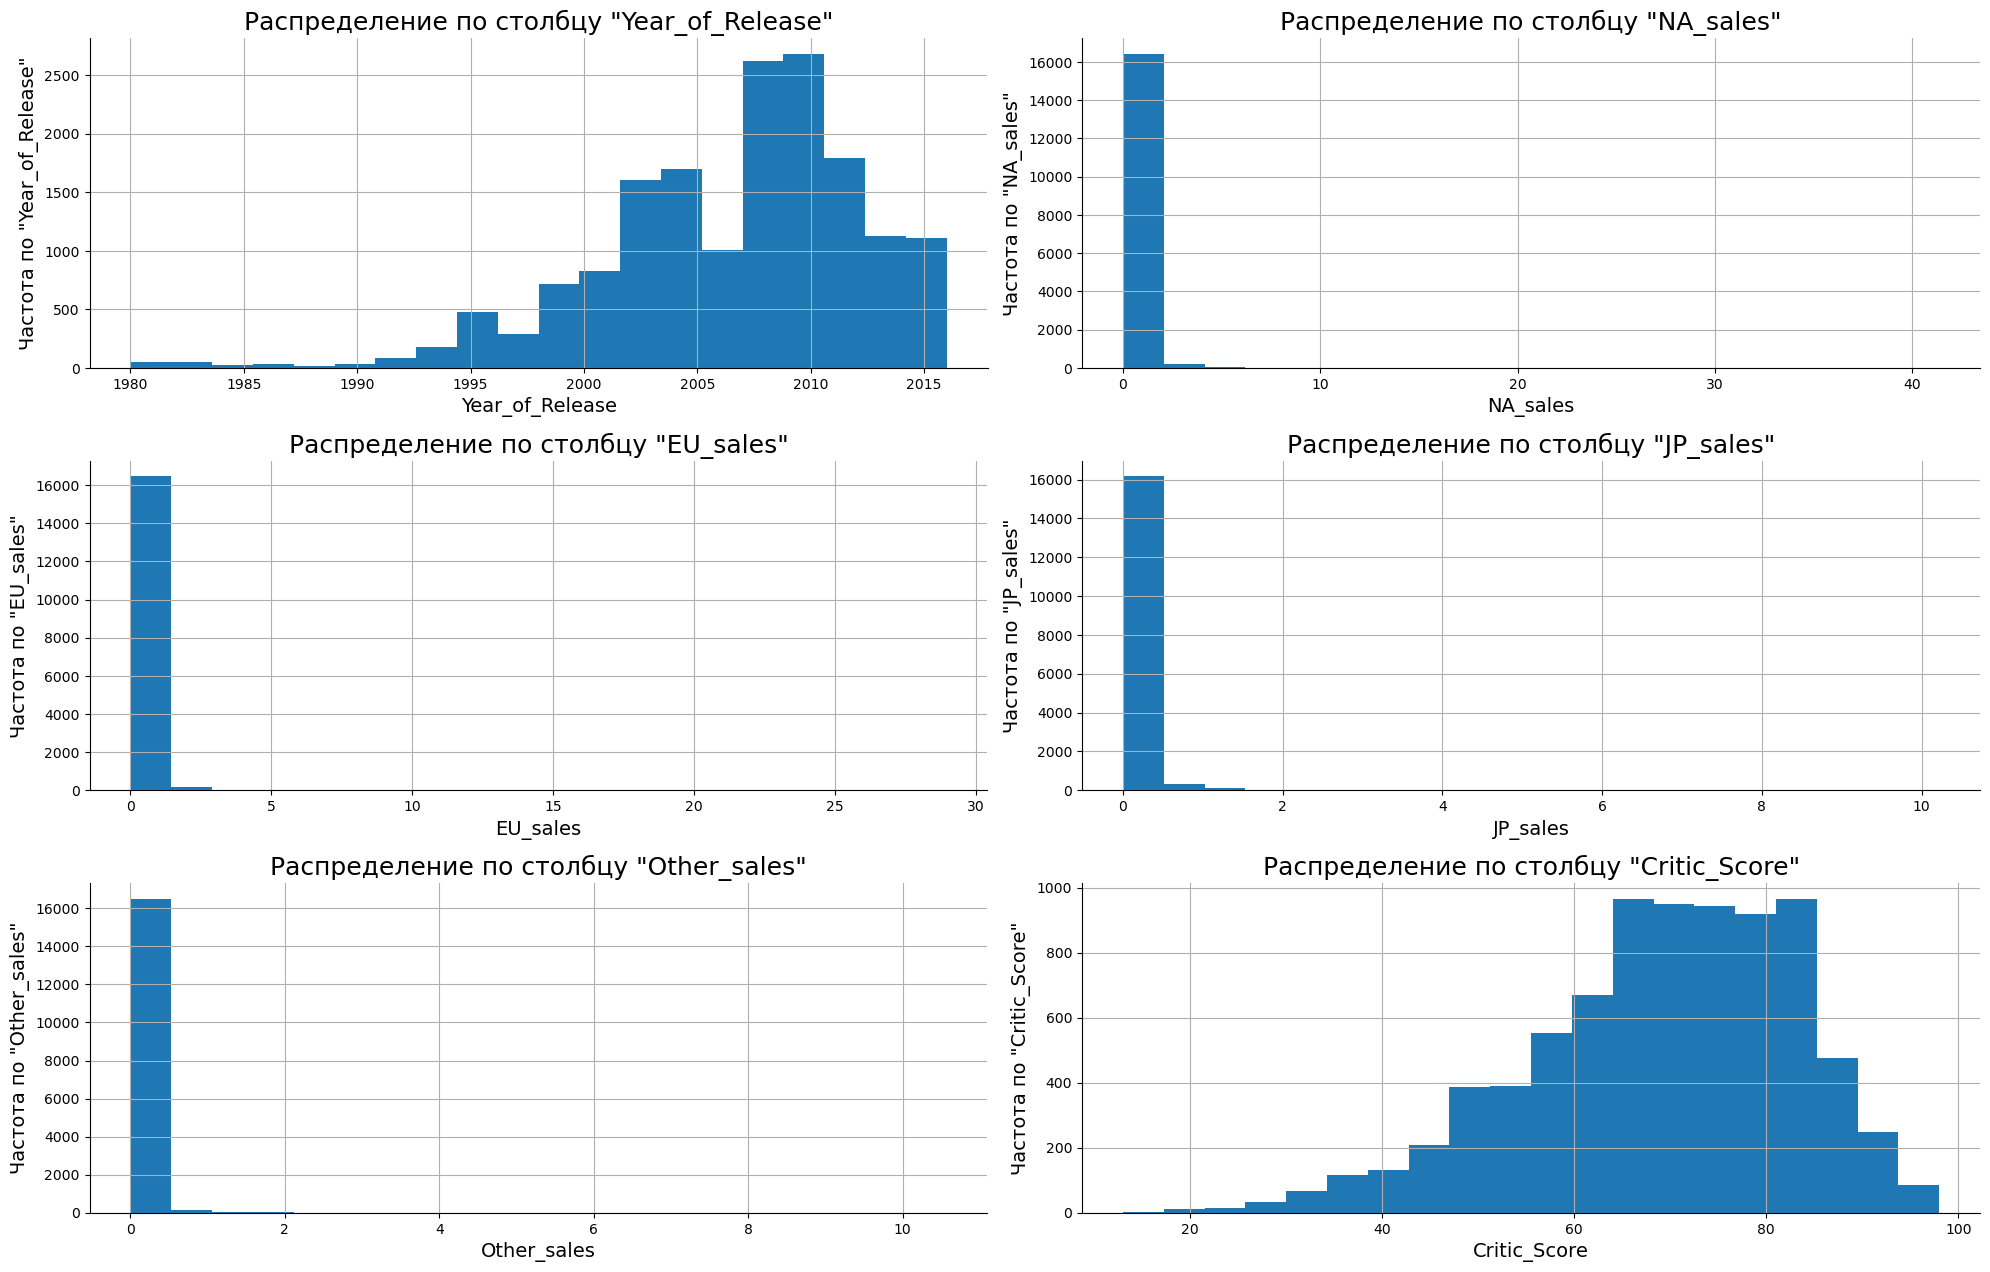

In [8]:
# Построим гистограммы для количественных столбцов нашего датасета
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 25))

# Выберем столбцы c типом данных int и float
selected_columns = [column for column in games.columns if games[column].dtype in ['int64', 'float64']]

# Визуализируем данные по выбранным столбцам
for i, column in enumerate(selected_columns):
        row = i // 2 # вычисление номера строки для текущего графика в сетке
        col = i % 2 # вычисление номера столбца для текущего графика в сетке
        games[column].hist(bins=20, ax=axes[row, col])
        axes[row, col].set_title(f'Распределение по столбцу "{column}"', fontsize=18)
        axes[row, col].set_xlabel(column, fontsize=14)
        axes[row, col].set_ylabel(f'Частота по "{column}"', fontsize=14)

# Скроем пустую рамку в конце вывода
for i in range(len(selected_columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

sns.despine()
plt.tight_layout()
plt.show()

Мы видим, что в столбцах "Year_of_release" и "Critic_Score", распределение похоже на нормальное со смещением влево. Вероятно, до 2000-х годов игр выпускалось не так много, поэтому мы видим левый "хвост", также видим два пика по годам: 2002-2005 и 2007-2011, в эти годы, вероятно, выпускалось более всего видео-игр. В столбце "Critic_Score" основная масса оценок критиков лежит в дапазоне от 65 до 85 баллов. Явно присутствуют выбросы.

**Выводы:**

На данном этапе мы:
- Прочитали файл с данными;
- Вывели и изучили общую информацию о нем;

Впереди предобработка и анализ данных.

<a id="2"></a>

## Предобработка данных

### Преобразуем названия стобцов

In [9]:
games.columns = games.columns.str.lower()

### Преобразуем типы данных, где необходимо

В слолбце "year_of_release" у нас подразумевается год выпуска игры, но нет данных ни по месяцу, ни по числу, ни по времени. Поэтому преобразуем данные в формат integer. Этого будет достаточно для нашего исследования. Сейчас данные выглядят так: "2,006.0000". 

In [10]:
# Переведем данные в строковый формат
games['year_of_release'] = games['year_of_release'].astype(str)

# Затем оставим текст только до точки
games['year_of_release'] = games['year_of_release'].str.partition('.')[0]

# Преобразуем данные в формат integer с учетом возможных пропусков в данных
games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce').astype('Int32')

В столбце "critic_score" мы преобразуем данные также к integer для удобства.

In [11]:
games['critic_score'] = pd.to_numeric(games['critic_score'], errors='coerce').astype('Int32')

Также необходимо привести данные столбца "user_score" к типу float, так как в нем должна быть оценка пользователей в числовом формате. При попытке поменять тип данных в столбце мы получаем ошибку ValueError: could not convert string to float: 'tbd'. Это означает, что в данных есть значение 'tbd' ("to be determined"). Это строковое значение, которое не может быть преобразовано в число. Есть несколько способов обработки этого значения:
- Один из подходов — заменить 'tbd' на NaN ("not a number"), что будет обозначать отсутствие данных. Затем мы сможем преобразовать столбец в числовой формат; 
- Также мы можем игнорировать строки, содержащие 'tbd', если эти данные не критически важны для нашего анализа. Мы можем отфильтровать датасет, чтобы исключить строки с 'tbd' перед преобразованием;
- Еще один способ - вместо NaN мы можем заменить 'tbd' на конкретное значение, если оно имеет смысл для нашего анализа.

Мне бы не хотелось на данном этапе игнорировать эти строки, так же как заменять их на что-то, пока я не изучу данные, поэтому я выберу первый способ.

In [12]:
# Заменяем tbd на NaN
games['user_score'] = games['user_score'].replace('tbd', pd.NA)

# Преобразуем столбец в числовой формат
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

### Проверим пропуски в датасете

In [13]:
# Создадим копию датасета до преобразований
temp = games.copy() 
len(temp)

16715

In [14]:
# Выведем количество пропущенных значений для датасета и отсортируем по возрастанию.
games.isna().sum().sort_values()

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
rating             6766
critic_score       8578
user_score         9125
dtype: int64

In [15]:
# Вычислим долю пропусков данных в столбцах 
pd.DataFrame(round(games.isna().mean()*100,3)).style.background_gradient('coolwarm')

,0
name,0.012000
platform,0.000000
year_of_release,1.609000
genre,0.012000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.319000
user_score,54.592000


Более половины значений пропущено в столбцах "critic_score" и "user_score" (51.3% и 54.6%, соответственно), а также в столбце "rating"  пропущено 40.5% данных. Это неудивительно, так как данные для исследования взяты из разных открытых источников, и могут быть неполными, так как заполнялись обычными людьми. Есть небольшое количество пропусков в столбцах "name" - 2 пропуска, "genre" - 2 пропуска, "year_of_release" - 269 пропусков (1.6%). Изучим столбцы с пропусками и решим, как их можно обработать.

In [16]:
# Посмотрим на пропуски в стобце name и genre
mask = games['name'].isna() | games['genre'].isna()
rows_with_missing_values = games[mask]
display(rows_with_missing_values)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.7800,0.5300,0.0000,0.0800,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.0000,0.0000,0.0300,0.0000,<NA>,NaN,NaN


Пропуски в данных столбцах совпали по строкам. Поскольку в нашем исследовании мы должны определить закономерности успешности игры, но ни названия ни жанра у нас нет, я удалю эти две строки.

In [17]:
games = games.dropna(subset=['name'])

In [18]:
# Посмотрим выборочно на пропуски в стобце year_of_release
mask = games['year_of_release'].isna()
rows_with_missing_values = games[mask]
display(rows_with_missing_values.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.2600,0.2600,0.0100,0.7100,94,8.5000,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.5900,2.3600,0.0400,0.5100,84,6.4000,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.8000,0.9700,0.0000,0.2900,74,7.9000,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.5700,1.0200,0.0000,0.4100,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.3600,0.1400,0.0000,0.0300,<NA>,NaN,NaN
627,Rock Band,X360,<NA>,Misc,1.9300,0.3300,0.0000,0.2100,92,8.2000,T
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.1500,0.1800,0.0000,0.0700,73,NaN,E
678,LEGO Indiana Jones: The Original Adventures,Wii,<NA>,Action,1.5100,0.6100,0.0000,0.2100,78,6.6000,E10+
719,Call of Duty 3,Wii,<NA>,Shooter,1.1700,0.8400,0.0000,0.2300,69,6.7000,T
805,Rock Band,Wii,<NA>,Misc,1.3300,0.5600,0.0000,0.2000,80,6.3000,T


В данном столбце 269 пропусков (1.6%). С одной стороны, не так много и можно было бы удалить. С другой стороны, мы ищем именно закономерности, определяющие успешность игры, и если даже предположить, что год выпуска впоследствие не войдет в топ-лист этих закономерностей, то удалив данные, мы можем упустить что-то важное по другим столбцам. В данном случае, я оставлю эти пропуски как есть.

Пропусков в столбцах "critic_score", "user_score", "rating" - очень много, удалить эти данные мы не можем. Чем-то заменить тоже, так как оценки пользователей и оценка критиков - крайне субъективная вещь. Оставляем пока эти пропуски как есть.  Мы не знаем также на  основании каких критериев выставляется рейтинг ESRB, но в данном столбце пропуски могут нести определенную информацию, заменим их на "Unknown". 

In [19]:
games['rating'] = games['rating'].fillna('Unknown')

### Проверим дубликаты в датасете

In [20]:
# Определим функцию для проверки данных на наличие явных дубликатов
def find_explicit_duplicates(dataset):
    
    # Находим явные дубликаты
    explicit_duplicates_cnt = display(f'Количество явных дубликатов: {dataset.duplicated().sum()}')
    
    explicit_duplicates = None
    explicit_duplicates_cnt = 0
    
    # Выводим дубликаты в виде таблицы, если они есть
    if dataset.duplicated().sum() > 0:
        explicit_duplicates = display(dataset[dataset.duplicated(keep=False)])
    
    else:
        display('Явные дубликаты не найдены')
    
    return explicit_duplicates_cnt, explicit_duplicates

In [21]:
# Проверим явные дубликаты в датасете 
dataset = games.copy()
find_explicit_duplicates(dataset)

'Количество явных дубликатов: 0'

'Явные дубликаты не найдены'

(0, None)

Явных дубликатов не найдено.

In [22]:
# Определим функцию для проверки данных на наличие неявных дубликатов
def find_implicit_duplicates(dataset, columns_to_compare):
    
    # Находим неявные дубликаты
    implicit_duplicates = dataset[dataset.duplicated(subset=columns_to_compare, keep=False)]
    if implicit_duplicates.empty:
        display('Неявных дубликатов нет.')
  
    return implicit_duplicates

In [23]:
dataset = games.copy()
columns_to_compare = ['name', 'platform', 'genre']
find_implicit_duplicates(dataset.sort_values(by=['name', 'year_of_release']), columns_to_compare)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.1100,0.2200,0.0000,0.2300,83,5.5000,E
16230,Madden NFL 13,PS3,2012,Sports,0.0000,0.0100,0.0000,0.0000,83,5.5000,E
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0000,0.1300,0.0200,0.1000,83,8.5000,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.0200,0.2300,0.0000,0.0400,82,8.5000,T
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.6200,0.7800,0.0100,0.1500,83,8.5000,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0000,0.0600,0.0000,0.0200,82,8.5000,T
1745,Sonic the Hedgehog,PS3,2006,Platform,0.4100,0.0600,0.0400,0.6600,43,4.1000,E10+
4127,Sonic the Hedgehog,PS3,<NA>,Platform,0.0000,0.4800,0.0000,0.0000,43,4.1000,E10+


Думаю, что тут можно было бы считать неявными дубликатами игры "Madden NFL 13" и "Sonic the Hedgehog". В обоих случаях создается ощущение, что в дублирующей строке информация только про продажам в Европе.  В случае с "Need for Speed: Most Wanted"- это не дубли, это разные релизы для разных платформ. Я объединю дублирующие строки для Madden NFL 13, сложив данные в стобце eu_sales, затем удалю дубликат, таким образом останется только одна строка с полными данными. Для Sonic the Hedgehog сделаю то же самое, несмотря на то, что в дублирующей строке отсутствует год выпуска, все остальные данные совпадают, что позволяет предполагать, что это все-таки дубли.

In [24]:
# Указываем конкретные индексы строк для объединения Madden NFL 13
index_to_combine_1 = 604
index_to_combine_2 = 16230

# Складываем значения eu_sales для указанных индексов
if index_to_combine_1 in games.index and index_to_combine_2 in games.index:
    games.loc[index_to_combine_1, 'eu_sales'] += games.loc[index_to_combine_2, 'eu_sales']
    # Удаляем строку с индексом index_to_combine_2
    games.drop(index_to_combine_2, inplace=True)

In [25]:
# Проверим, корректно ли прошло объединение
display(games.loc[604])

name               Madden NFL 13
platform                     PS3
year_of_release             2012
genre                     Sports
na_sales                  2.1100
eu_sales                  0.2300
jp_sales                  0.0000
other_sales               0.2300
critic_score                  83
user_score                5.5000
rating                         E
Name: 604, dtype: object

In [26]:
# Указываем конкретные индексы строк для объединения Sonic the Hedgehog
index_to_combine_1 = 1745
index_to_combine_2 = 4127

# Складываем значения eu_sales для указанных индексов
if index_to_combine_1 in games.index and index_to_combine_2 in games.index:
    games.loc[index_to_combine_1, 'eu_sales'] += games.loc[index_to_combine_2, 'eu_sales']
    # Удаляем строку с индексом index_to_combine_2
    games.drop(index_to_combine_2, inplace=True)

In [27]:
# Проверим, корректно ли прошло объединение
display(games.loc[1745])

name               Sonic the Hedgehog
platform                          PS3
year_of_release                  2006
genre                        Platform
na_sales                       0.4100
eu_sales                       0.5400
jp_sales                       0.0400
other_sales                    0.6600
critic_score                       43
user_score                     4.1000
rating                           E10+
Name: 1745, dtype: object

In [28]:
# Еще раз проверим неявные дубликаты
dataset = games.copy()
columns_to_compare = ['name', 'platform', 'year_of_release', 'genre']
find_implicit_duplicates(dataset.sort_values(by=['name', 'year_of_release']), columns_to_compare)

'Неявных дубликатов нет.'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Отлично, неявные дубликаты обработаны и удалены.

### Проверим уникальные значения в столбцах датасета

In [29]:
# Определим функцию, которая будет выводить описание данных в столбце, количество уникальных значений и 
# топ-5 лист самых популярных значений
def unique_describe(dataset):
    return  display(dataset.describe(), 
                    f'Количество уникальных значений: {len(dataset.unique())}',
                    dataset.value_counts().head())                   

In [30]:
# Проанализируем данные столбца name
dataset = games['name'].copy()
unique_describe(dataset)

count                           16711
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object

'Количество уникальных значений: 11559'

name
Need for Speed: Most Wanted    12
Ratatouille                     9
LEGO Marvel Super Heroes        9
FIFA 14                         9
Madden NFL 07                   9
Name: count, dtype: int64

Большинство игр, вероятно, имело по одному релизу, но есть и такие, которые перевыпускались в разные годы, на разных платформах, например, Need for Speed: Most Wanted - повторяется 12 раз. 

Топ-5 самых популярных игр: 
- Need for Speed: Most Wanted;
- FIFA 14;
- LEGO Marvel Super Heroes;
- Ratatouille;
- Madden NFL 07.

In [31]:
# Проанализируем данные столбца platform
dataset = games['platform'].copy()
unique_describe(dataset)

count     16711
unique       31
top         PS2
freq       2161
Name: platform, dtype: object

'Количество уникальных значений: 31'

platform
PS2     2161
DS      2151
PS3     1329
Wii     1320
X360    1262
Name: count, dtype: int64

Всего в датасете представлена 31 игровая платформа.
Топ-5 самых популярных: 
- PS2;
- DS;
- PS3;
- Wii;
- X360.

In [32]:
# Проанализируем данные столбца year_of_release
dataset = games['year_of_release'].copy()
unique_describe(dataset)

count   16,443.0000
mean     2,006.4859
std          5.8755
min      1,980.0000
25%      2,003.0000
50%      2,007.0000
75%      2,010.0000
max      2,016.0000
Name: year_of_release, dtype: Float64

'Количество уникальных значений: 38'

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
Name: count, dtype: Int64

У нас есть данные с 1980 по 2016. Больше всего игр выходило в продакшн с 2007 по 2011 годы, с пиком в  2008 году.

In [33]:
# Проанализируем данные столбца genre
dataset = games['genre'].copy()
unique_describe(dataset)

count      16711
unique        12
top       Action
freq        3369
Name: genre, dtype: object

'Количество уникальных значений: 12'

genre
Action          3369
Sports          2347
Misc            1750
Role-Playing    1498
Shooter         1323
Name: count, dtype: int64

Уникальных значений в столбце 12. Топ-5 наиболее популярных жанров:
- Action;
- Sports;
- Misc;
- Role-Playing;
- Shooter.

In [34]:
# Проанализируем данные столбца na_sales
dataset = games['na_sales'].copy()
unique_describe(dataset)

count   16,711.0000
mean         0.2633
std          0.8136
min          0.0000
25%          0.0000
50%          0.0800
75%          0.2400
max         41.3600
Name: na_sales, dtype: float64

'Количество уникальных значений: 402'

na_sales
0.0000    4505
0.0200     576
0.0300     561
0.0400     549
0.0100     545
Name: count, dtype: int64

Разброс между минимальным количеством проданных копий и максимальным огромный - более 41 миллиона. Стандартное отклонение сильно отличается от среднего, выбросы будут очень большие. 4505 игр вообще не покупались в Северной Америке, вероятно, потому, рекламные компании не охватили данный регион.

In [35]:
# Проанализируем данные столбца eu_sales
dataset = games['eu_sales'].copy()
unique_describe(dataset)

count   16,711.0000
mean         0.1451
std          0.5034
min          0.0000
25%          0.0000
50%          0.0200
75%          0.1100
max         28.9600
Name: eu_sales, dtype: float64

'Количество уникальных значений: 307'

eu_sales
0.0000    5869
0.0100    1493
0.0200    1308
0.0300     926
0.0400     709
Name: count, dtype: int64

Тут похожая картина. Большие выбросы. Максимальное значение очень сильно отличается даже от 75% квартиля. 5869 игр не были куплены в Европе.

In [36]:
# Проанализируем данные столбца jp_sales
dataset = games['jp_sales'].copy()
unique_describe(dataset)

count   16,711.0000
mean         0.0776
std          0.3089
min          0.0000
25%          0.0000
50%          0.0000
75%          0.0400
max         10.2200
Name: jp_sales, dtype: float64

'Количество уникальных значений: 244'

jp_sales
0.0000    10511
0.0200      741
0.0100      706
0.0300      545
0.0400      397
Name: count, dtype: int64

В Японии ситуация не лучше. 10511 игр сюда не дошли.

In [37]:
# Проанализируем данные столбца other_sales
dataset = games['other_sales'].copy()
unique_describe(dataset)

count   16,711.0000
mean         0.0473
std          0.1868
min          0.0000
25%          0.0000
50%          0.0100
75%          0.0300
max         10.5700
Name: other_sales, dtype: float64

'Количество уникальных значений: 155'

other_sales
0.0000    6598
0.0100    3464
0.0200    1618
0.0300     926
0.0400     654
Name: count, dtype: int64

В остальных странах ситуация та же, большие выбросы, 6598 игр не продавались в регионе.

In [38]:
# Проанализируем данные столбца critic_score
dataset = games['critic_score'].copy()
unique_describe(dataset)

count   8,135.0000
mean       68.9691
std        13.9360
min        13.0000
25%        60.0000
50%        71.0000
75%        79.0000
max        98.0000
Name: critic_score, dtype: Float64

'Количество уникальных значений: 83'

critic_score
70    256
71    254
75    245
78    240
73    238
Name: count, dtype: Int64

Минимальная оценка критиков - 13 баллов из 100, максимальная - 98, в топ-5 попали значения 70, 71, 75, 78, 73.

In [39]:
# Проанализируем данные столбца user_score
dataset = games['user_score'].copy()
unique_describe(dataset)

count   7,588.0000
mean        7.1257
std         1.4997
min         0.0000
25%         6.4000
50%         7.5000
75%         8.2000
max         9.7000
Name: user_score, dtype: float64

'Количество уникальных значений: 96'

user_score
7.8000    324
8.0000    290
8.2000    282
8.3000    254
8.5000    253
Name: count, dtype: int64

Минимальная оценка пользователей - 0 баллов из 10, максимальная - 9.7, в топ-5 попали значения 7.8, 8.0, 8.2, 8.3, 8.5.

In [40]:
# Проанализируем данные столбца rating
dataset = games['rating'].copy()
unique_describe(dataset)
display(games['rating'].unique())

count       16711
unique          9
top       Unknown
freq         6764
Name: rating, dtype: object

'Количество уникальных значений: 9'

rating
Unknown    6764
E          3989
T          2961
M          1563
E10+       1419
Name: count, dtype: int64

array(['E', 'Unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

В датасете 8 уникальных рейтингов. Чаще всего используется рейтинг "E". Если погуглить, то можно получить следующую информацию по обозначениям:
- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое;
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults");
- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры;
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года;
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику;
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики;
- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

В данном случае, я бы сказала, что "AO" и "M", "E" и "K-A" - это аналоги. Посмотрим, сколько строк с рейтингом "AO" и "K-A".

In [41]:
games.query('rating == "AO"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
875,Grand Theft Auto: San Andreas,XB,2005,Action,1.2600,0.6100,0.0000,0.0900,93,8.6000,AO


In [42]:
games.query('rating == "K-A"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
656,Theme Hospital,PC,1997,Strategy,2.3000,0.1000,0.0000,0.0000,<NA>,9.0000,K-A
903,PaRappa The Rapper,PS,1996,Misc,0.2600,0.1600,1.4600,0.0300,92,7.4000,K-A
16681,Worms 2,PC,1997,Strategy,0.0000,0.0100,0.0000,0.0000,<NA>,8.1000,K-A


1 и 3 строки, соответственно. Я заменю "AO" на "M", "K-A" на "E".

In [43]:
games['rating'] = games['rating'].replace({'AO':'M', 'K-A':'E'})

In [44]:
# Сверяем наши данные по количеству строк по окончанию обработки данных в датасете
a, b = len(temp), len(games)
print(len(temp), len(games), round((a - b) / a * 100, 2))

16715 16711 0.02


В итоге, мы удалили 4 строки.

### Добавим новый столбец в датасет 

In [45]:
# Посчитаем суммарные продажи во всех регионах и запишем их в столбец total_sales
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

**Выводы:**

На данном этапе мы:
- привели названия столбцов к нижнему регистру;
- преобразовали тип данных в столбцах "year_of_release" на integer, в "user_scores" на float;
- в столбце "critic_scores" обнаружили данные формата 'tbd' ("to be determined"). Это строковое значение, которое не может быть преобразовано в число. Преобразовали данные в integer, заменив 'tbd' на NaN ("not a number");
- проверили данные на пропуски, они обнаружены в слудеющих столбцах:
  - "critic_score" - 51.3%, оставили без изменений;
  - "user_score" - 54.6%, оставили без изменений;
  - "rating" - 40.5%, заменили на "Unknown";
  - "name" - 2 пропуска, удалили;
  - "genre" - 2 пропуска, удалили;
  - "year_of_release" - 269 пропусков (1.6%), оставили без изменений.  
  Можно предположить, что такое количество пропусков обнаружено из-за того, что данные взяты, во-первых, из разных исторических источников за много лет, какие-то признаки могли появиться позже, к примеру, во-вторых,  что-то заполнялось пользователями, это крайне субъективная вещь - захотел поставил оценку игре, не захотел - не поставил и т.д. В столбце "rating" заменили пропуски заглушкой, так как они могут нести определенную информацию.
  
- проверили данные на явные дубликаты, они не обнаружены;
- проверили данные на неявные дубликаты, обнаружили 2. Дозаполнили данные в первом вхождении, второе удалили.
- изучили уникальные значения в датасете, внесли изменения в столбце "rating": заменили "AO" на "M", "K-A" на "E";
- выяснили, что у нас есть данные с 1980 по 2016 годы;
- добавили новый столбец  "total_sales" c суммарными продажами по всем регионам.

<a id="3"></a>

## Исследовательский анализ данных

### Исследование количества игр по годам

In [46]:
# Посчитаем количество релизов по годам
distribution_by_year = games.groupby('year_of_release').agg({'name':'count'}).reset_index()
distribution_by_year.columns = ['year_of_release','count_games']
distribution_by_year = distribution_by_year.sort_values(by='count_games', ascending=False)
distribution_by_year

,year_of_release,count_games
28,2008,1427
29,2009,1426
30,2010,1255
27,2007,1197
31,2011,1136
26,2006,1006
25,2005,939
22,2002,829
23,2003,775
24,2004,762


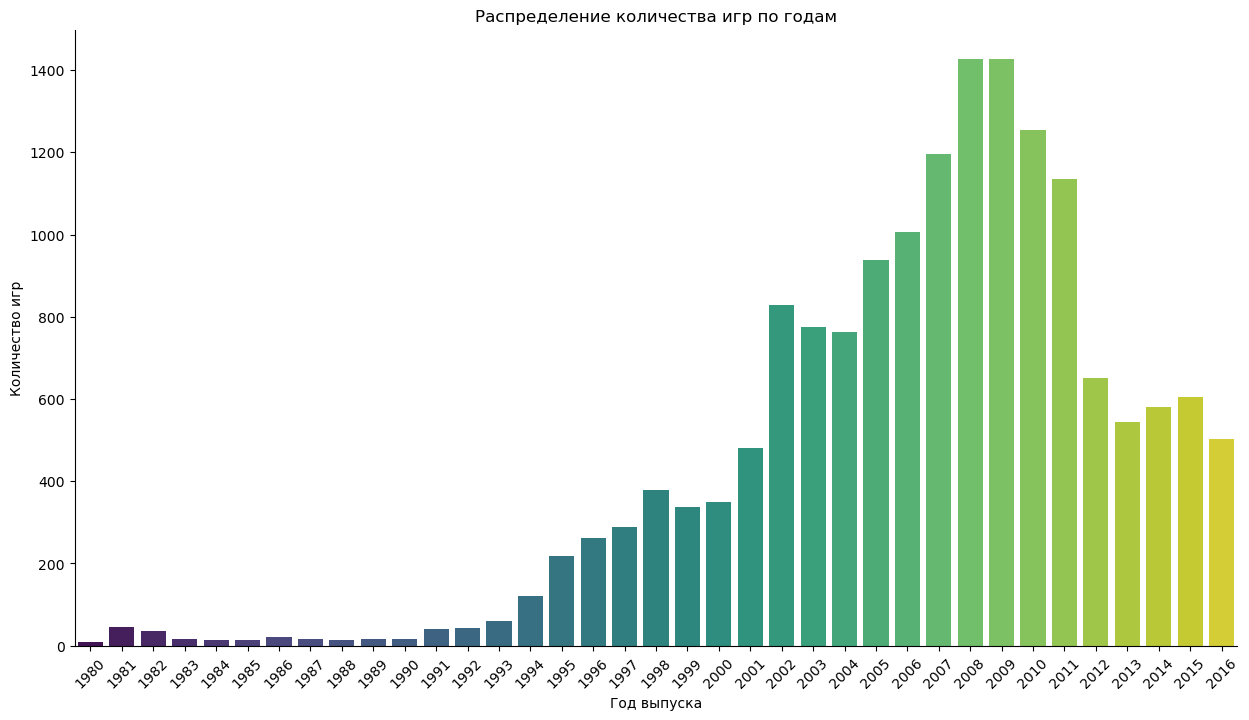

In [47]:
# Визуализируем полученные данные
plt.figure(figsize=(15, 8))

sns.barplot(data=distribution_by_year, x='year_of_release', y='count_games', palette='viridis')
plt.title('Распределение количества игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)

sns.despine()
plt.show()

In [48]:
# Посчитаем общее количество релизов до 1994 года включительно
distribution_by_year.query('year_of_release <= 1994')['count_games'].sum()

486

На графике мы видим, что данные до 1994 года  включительно можно не учитывать при анализе. Их всего 486 из более чем 16 тысяч. Слишком мало выпускалось видео-игр на рынок в эти годы. Более менее существенный рост количества релизов начинается с 1995 года, пик приходится на период с 2007 по 2011 годы, затем в 2012 году происходит очень резкий спад практически в 2 раза. До 2016 года, на котором заканчиваются наши данные,  роста выше данных 2012 года так и не случилось.

### Исследование общего количества игр по платформам

In [49]:
# Посчитаем общее количество продаж игр по платформам
distribution_by_platform = games.groupby(['platform']).agg({'total_sales':'sum'}).reset_index()
distribution_by_platform.columns = ['platform', 'total_sum']
distribution_by_platform = distribution_by_platform.sort_values(by='total_sum', ascending=False)
distribution_by_platform

,platform,total_sum
16,PS2,"1,255.7700"
28,X360,971.4200
17,PS3,939.6500
26,Wii,907.5100
4,DS,806.1200
15,PS,730.8600
6,GBA,317.8500
18,PS4,314.1400
19,PSP,294.0500
13,PC,259.5200


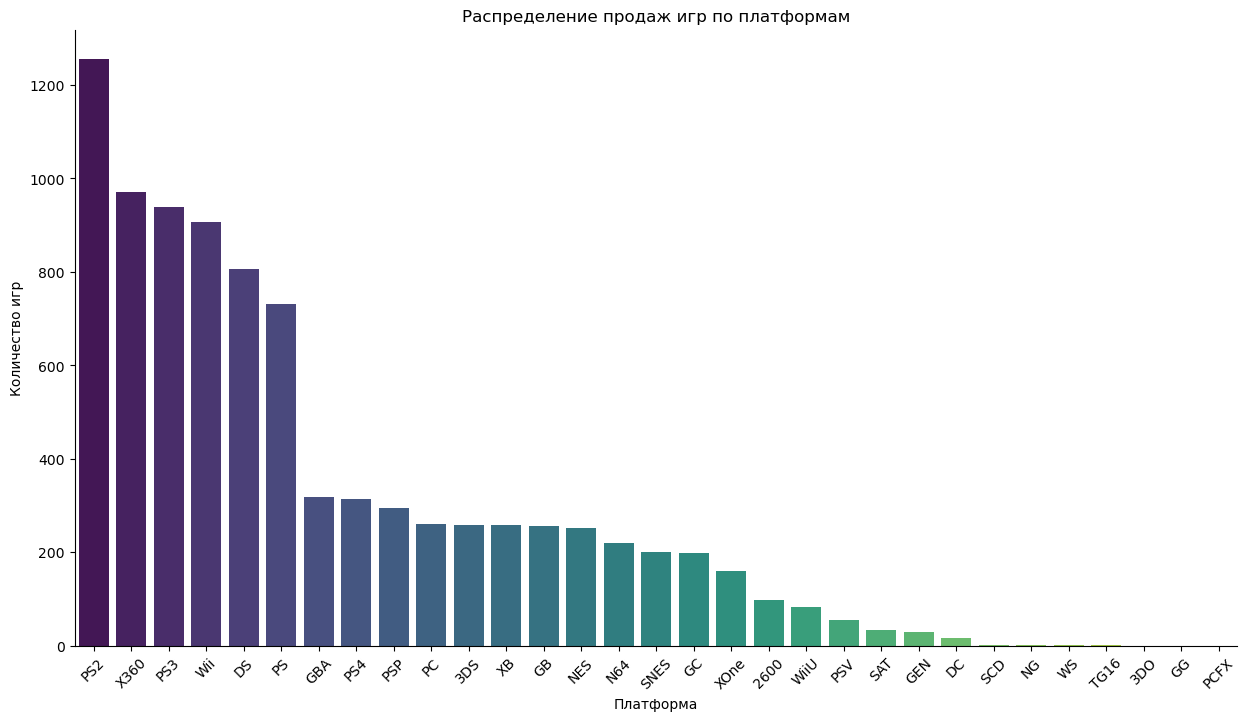

In [50]:
# Визуализируем данные по продажам по платформам
plt.figure(figsize=(15, 8))

sns.barplot(data=distribution_by_platform, x='platform', y='total_sum', palette='viridis')
plt.title('Распределение продаж игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)

sns.despine()
plt.show()

Наиболее популярными оказались платформы "PS2", "X360", "PS3", "Wii", "DS", "PS". 

In [51]:
# Сделаем срез по топ-6 платформам
distribution_by_platform_6 = games\
                    .query('platform in ["PS2", "X360", "PS3", "Wii", "DS", "PS"]')                                  
distribution_by_platform_6 = distribution_by_platform_6.groupby(['platform', 'year_of_release'])\
                                                       .agg({'total_sales':'sum'}).reset_index()
distribution_by_platform_6.columns = ['platform', 'year_of_release', 'total_sum']
distribution_by_platform_6 = distribution_by_platform_6.sort_values(by='platform')
distribution_by_platform_6

,platform,year_of_release,total_sum
0,DS,1985,0.0200
1,DS,2004,17.2700
2,DS,2005,130.1400
3,DS,2006,119.8100
4,DS,2007,146.9400
...,...,...,...
56,X360,2006,51.6200
55,X360,2005,8.2500
65,X360,2015,11.9600
59,X360,2009,120.2900


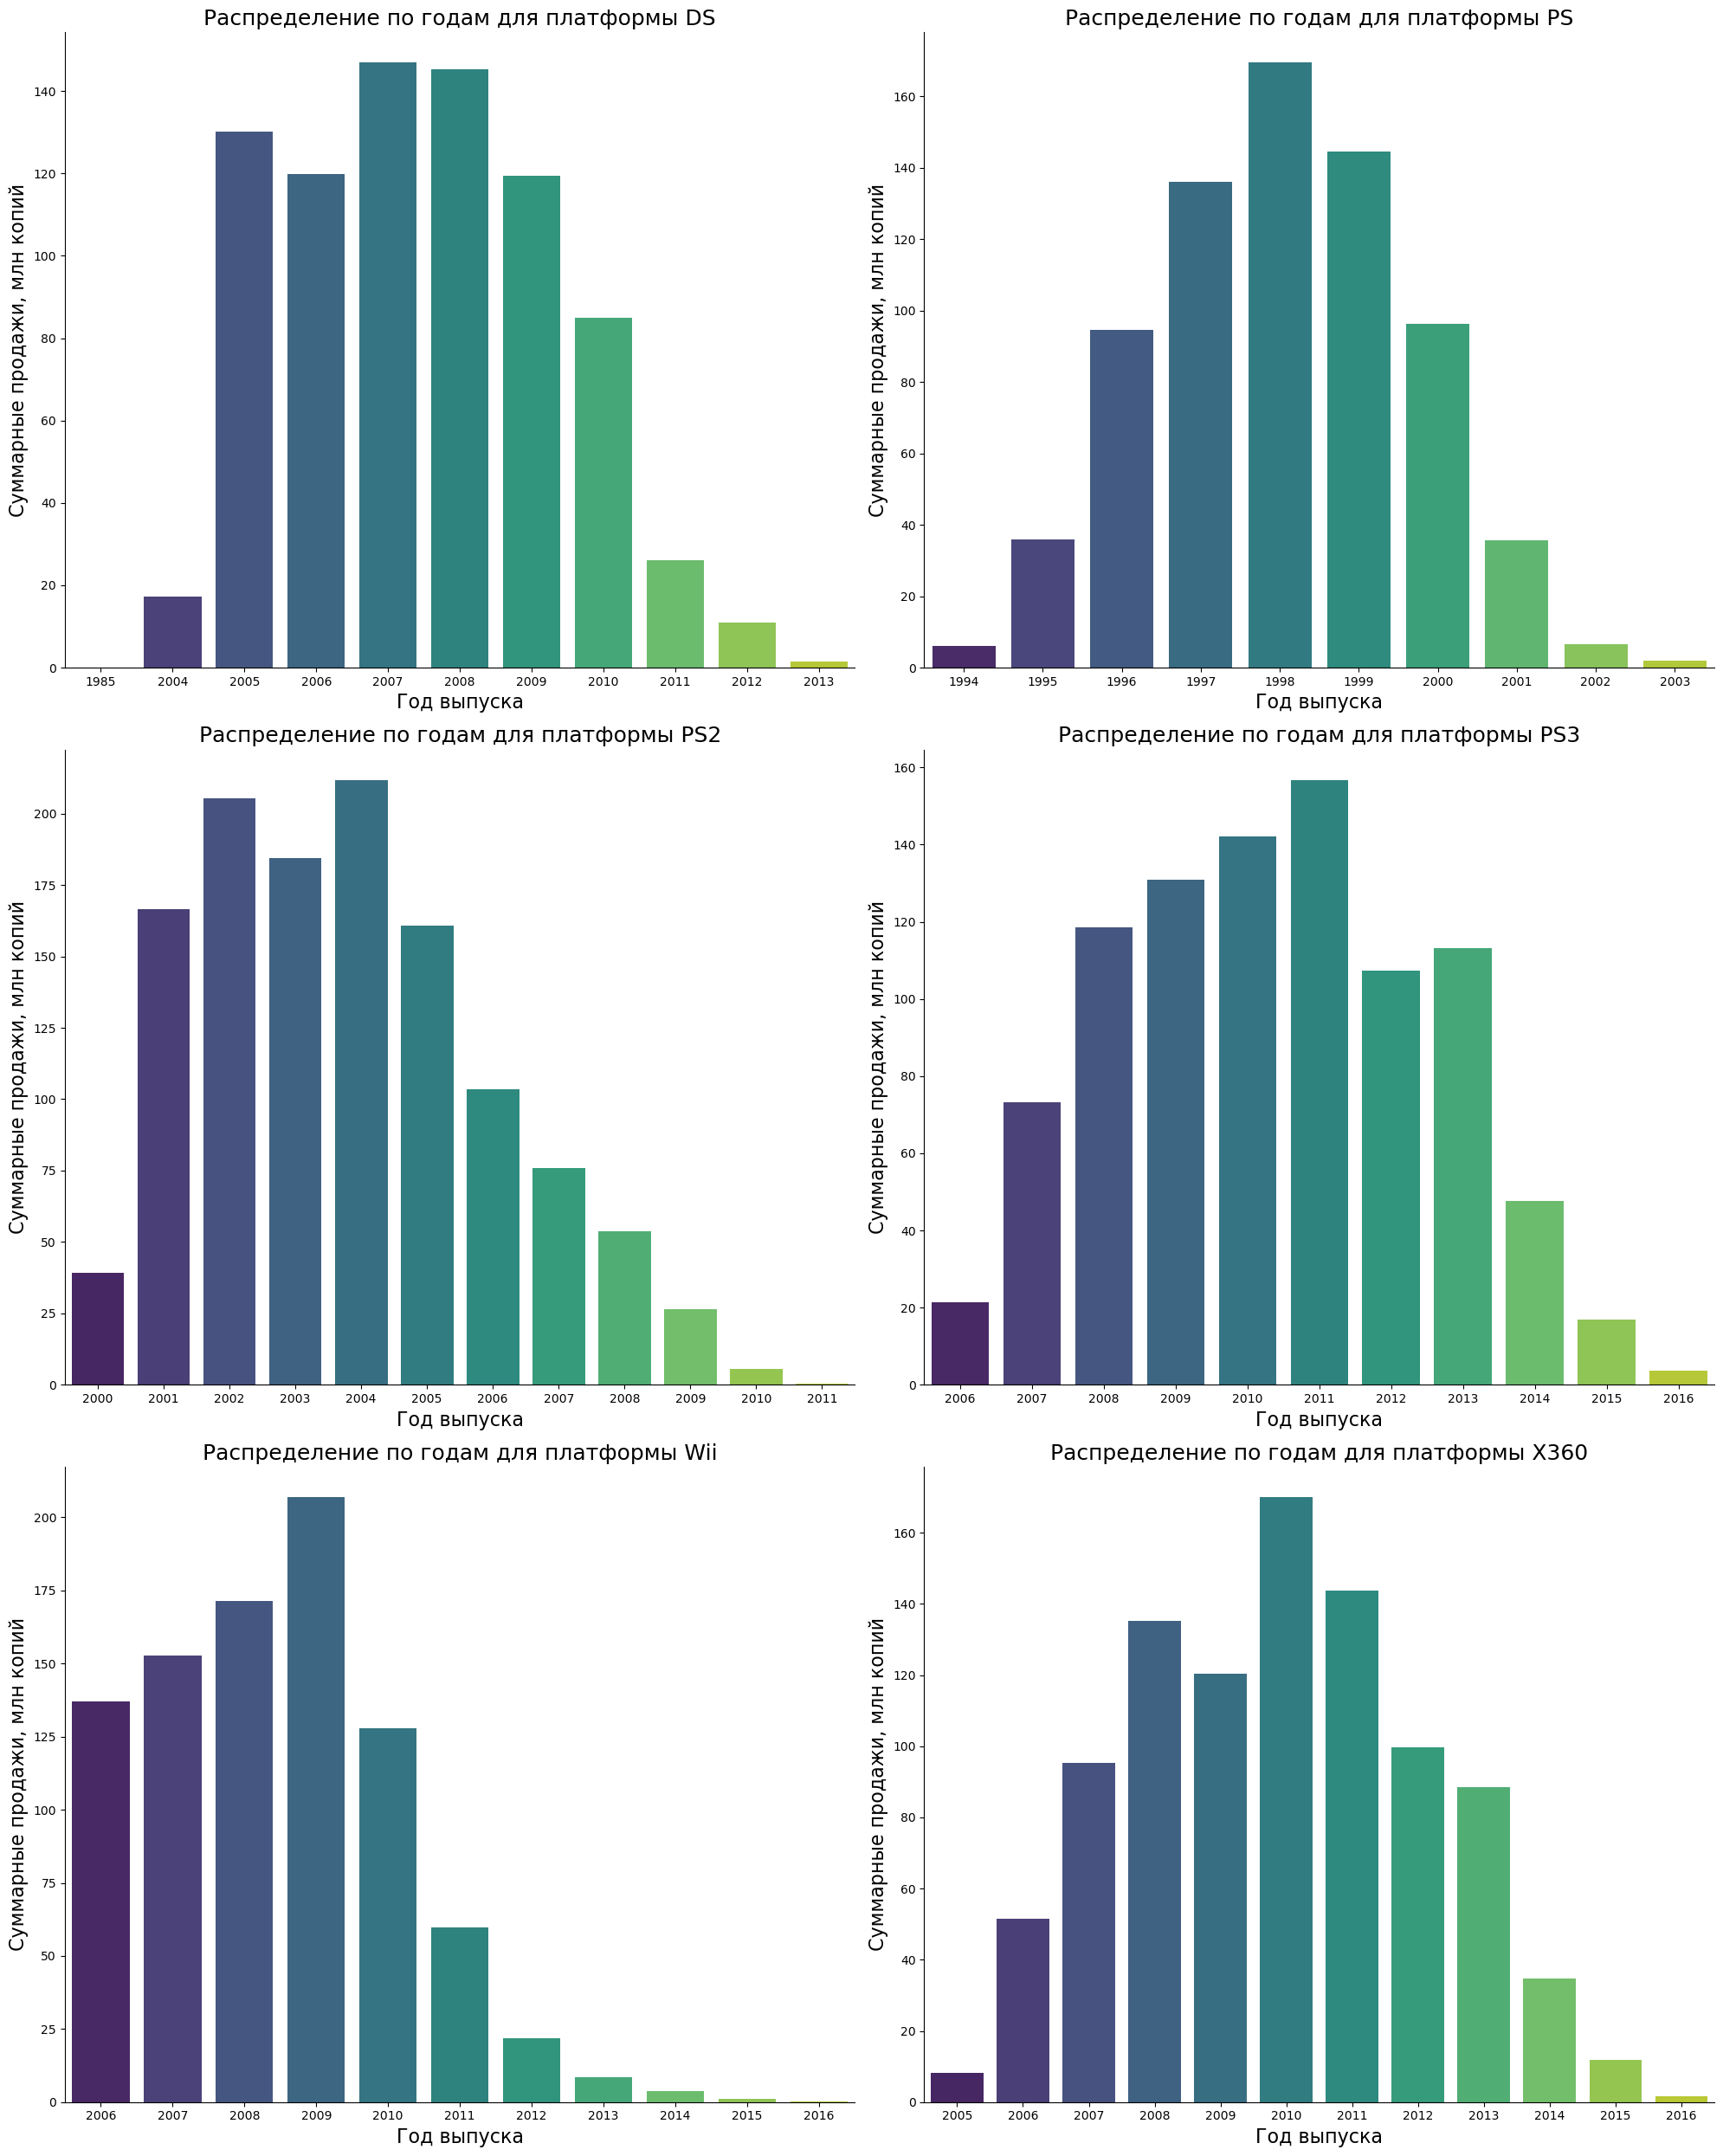

In [52]:
# Визуализируем данные по топ-6 платформам по годам
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 25))

for i, platform in enumerate(distribution_by_platform_6['platform'].unique()):
    row = i // 2 # вычисление номера строки для текущего графика в сетке
    col = i % 2 # вычисление номера столбца для текущего графика в сетке
    
    # Фильтруем данные для текущей платформы
    platform_data = distribution_by_platform_6[distribution_by_platform_6['platform'] == platform]
    
    # Строим график распределения продаж по годам
    if not platform_data.empty:
        sns.barplot(data=platform_data, x='year_of_release', y='total_sum', palette='viridis', ax=axes[row, col])
    
        axes[row, col].set_title(f'Распределение по годам для платформы {platform}', fontsize=18)
        axes[row, col].set_xlabel('Год выпуска', fontsize=16)
        axes[row, col].set_ylabel('Суммарные продажи, млн копий', fontsize=16)

sns.despine()
plt.tight_layout()
plt.show()

Итак, на графиках мы видим следующее:
- платформа "DS": тут вероятнее всего закралась ошибка. Консоль "DS" или "Nintendo DS" была выпущена в продакшн только в 2004 году, никак не в 1985. Была очень популярна с 2005 по 2008 год, в 2009 году популярность начала падать, к 2013 году практически сошла на "нет";
- платформа "PS" или "PS1": была выпущена в Японии в 1994 году, в США продажи начались в 1995. Пик популярности с 1996 по 1999. К 2003 году, вероятно, ее заменила "PS" следующего поколения;
- платформа "PS2": продажи стартовали в 2000 году, пик популярности 2001-2004 годы (особенно 2002 и 2004), с 2005 по 2011 виден спад популярности;
- платформа "PS3": появилась осенью 2006 года в Японии, рост популярности наблюдается с 2007 по 2011 годы, затем начинается спад до 2016 года;
- платформа Wii: появилась в продаже в 2006 году, была популярна до 2009 года, к 2016 году популярность сошла на "нет";
- платформа X360: начала продаваться осенью 2005 года в США, нельзя сказать, что резко набрала популярноть, пиковые годы 2008-2011.

Отсюда можно сделать вывод, что "срок жизни" популярной платформы 10-12 лет, при том, что такие платформы как PlayStation перевыпускают новую версию раз в 6 лет, но, как правило, новая версия хотя бы частично совместима со старой, и старая версия резко с рынка не уходит. "Срок популярности" любой платформы в среднем составляет 4-5 лет.

In [53]:
# Сделаем срез для платформы DS и 1985 года интереса ради
games.query('platform == "DS" & year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0000,0.0000,0.0200,0.0000,<NA>,NaN,Unknown,0.0200


Тут явно ошибка. Игра с таким названием вышла в мае 2010 года, продавалась исключительно в Японии. Продано было порядка 20000 тыс. копий. Исправим эту ошибку.

In [54]:
games.at[15957, 'year_of_release'] = 2010

### Расчет среднего "срока жизни" платформы

In [55]:
# Посчитаем "срок жизни" для каждой платформы
platform_lifetimes = games.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()

# Рассчитываем разницу между максимальным и минимальным годом
platform_lifetimes['platform_lifetime'] = platform_lifetimes['max'] - platform_lifetimes['min']
platform_lifetimes = platform_lifetimes.sort_values(by='platform_lifetime', ascending=False)

platform_lifetimes

,platform,min,max,platform_lifetime
13,PC,1985,2016,31
5,GB,1988,2001,13
11,NES,1983,1994,11
28,X360,2005,2016,11
19,PSP,2004,2015,11
16,PS2,2000,2011,11
3,DC,1998,2008,10
26,Wii,2006,2016,10
17,PS3,2006,2016,10
0,2600,1980,1989,9


In [56]:
# Рассчитываем медианное значение по столбцу platform_lifetime, среднее тут не очень подойдет
# из-за большого разброса в значениях
average_lifetime = platform_lifetimes['platform_lifetime'].median()
print(f'Средний срок жизни платформы: {round(average_lifetime)} лет')

Средний срок жизни платформы: 6 лет


В дальнейшем я буду ориентироваться на то, что актуальный период для построения прогноза на 2017 год - 5 последних лет в данных (с 2012 по 2016 годы) - срок "популярности" платформы.

### Исследование платформ за актуальный период

In [57]:
# Сделаем срез в данных с 2012 по 2016 годы
games_actual = games.query('year_of_release >= 2012')

In [58]:
# Посчитаем общие продажи для платформ
distribution_by_platform_act = games_actual.groupby('platform')['total_sales'].sum().reset_index()
distribution_by_platform_act = distribution_by_platform_act.sort_values(by='total_sales', ascending=False)
distribution_by_platform_act

,platform,total_sales
4,PS4,314.1400
3,PS3,288.7900
9,X360,236.5400
0,3DS,194.6100
10,XOne,159.3200
8,WiiU,82.1900
2,PC,62.6500
6,PSV,49.1800
7,Wii,35.3700
1,DS,12.5500


In [59]:
# Выводим топ-5 платформ по общим продажам
platforms_top5 = distribution_by_platform_act.head()

platforms_top5

,platform,total_sales
4,PS4,314.1400
3,PS3,288.7900
9,X360,236.5400
0,3DS,194.6100
10,XOne,159.3200


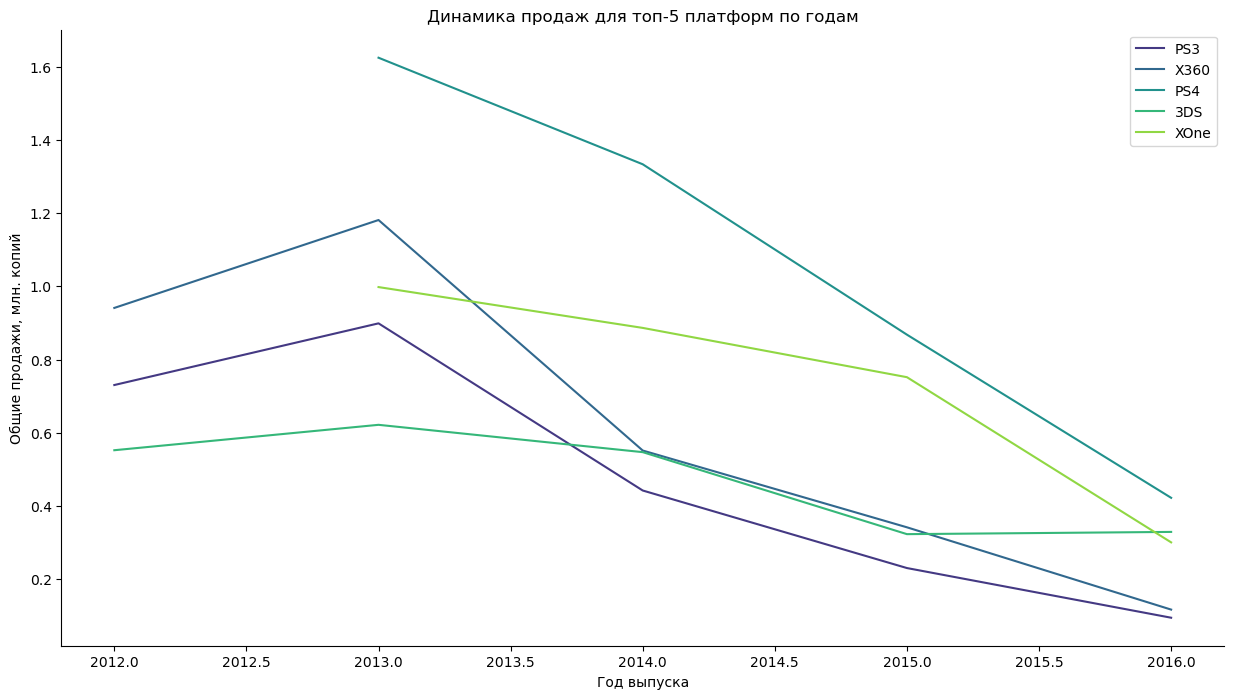

In [60]:
# Визуализируем динамику продаж для топ-5 платформ
plt.figure(figsize=(15, 8))

platform_data = games_actual.loc[games_actual['platform'].isin(platforms_top5['platform'])]

sns.lineplot(data=platform_data, x='year_of_release', y='total_sales', hue='platform', errorbar=None, palette='viridis')

plt.title('Динамика продаж для топ-5 платформ по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Общие продажи, млн. копий')
plt.legend()

sns.despine()
plt.show()

Судя по динамике продаж за последние 4 года, "PS4" провалилась в продажах, единственная платформа, которая показала рост продаж с момента выхода - это "3DS", она же единственная сумела к 2016 году после череды падений с 2014 года показать какой-то небольшой рост. "X360" и "PS3" показали резкий скачок роста в 2012 - 2013 годах, затем продажи так же резко начали падать. "XOne", также как и "PS4" никакого роста в продажах не дала. 

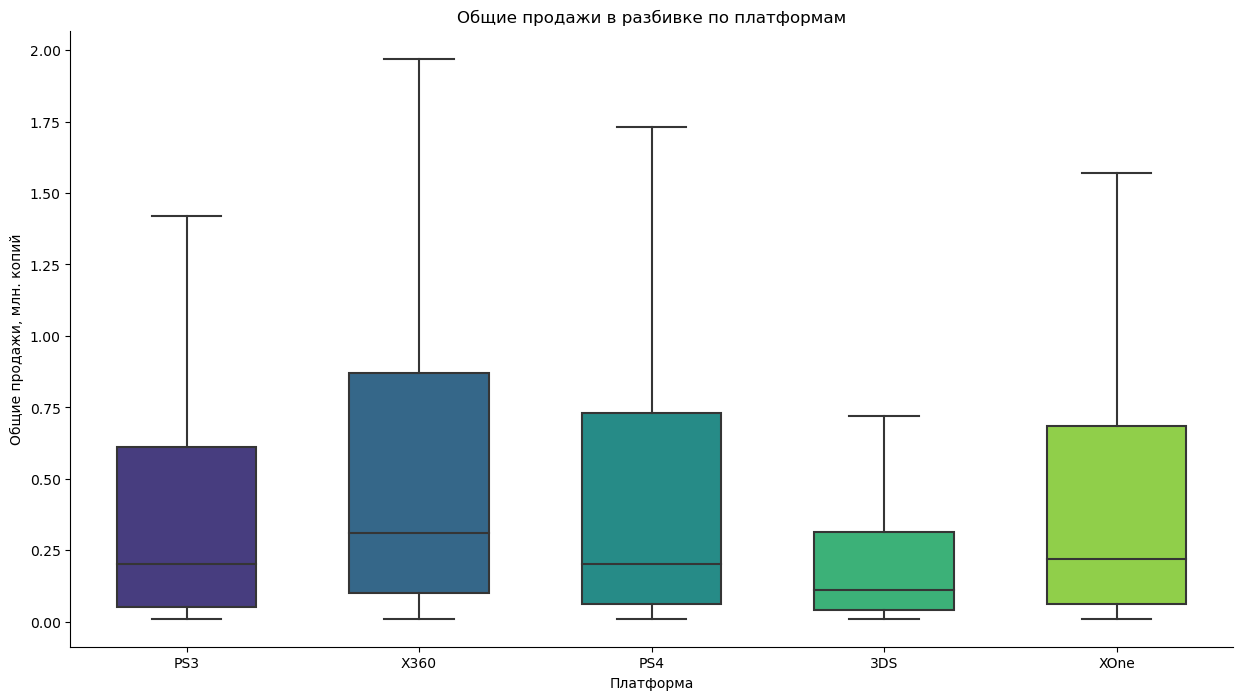

In [61]:
# Построим диаграммы "ящики с усами" по глобальным продажам  игр в разбивке по платформам
plt.figure(figsize=(15, 8))
sns.boxplot(data=platform_data, x='platform', y='total_sales',  showfliers=False, width=0.6, saturation=0.9, 
           palette='viridis')
plt.title('Общие продажи в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи, млн. копий')

sns.despine()
plt.show()

По количеству продаж в мире лидирует "X360", на втором месте "PS4", на третьем "XOne". Это разрекламированные и ожидаемые платформы во всем мире, получается, что после старта продаж они приносят очень большую прибыль, потом продажи падают, но платформы с более стабильными продажами на рынке ("3DS") по прибыли не могут с ними сравниться. 

Проанализируем, как отзывы покупателей и критиков влияют на продажи, например, платформы "X360".

In [62]:
# Проверим срез на пропуски
display(games_actual.shape)
games_actual.isna().sum()

(2885, 12)

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1574
user_score         1355
rating                0
total_sales           0
dtype: int64

В полезных для нас данных пропусков очень много, около половины. Для дальнейшего исследования сделаем срез данных без пропусков.

In [63]:
games_actual_cleaned = games_actual.dropna(subset=['critic_score', 'user_score']).copy()

In [64]:
display(games_actual_cleaned.shape)
games_actual_cleaned.isna().sum()

(1296, 12)

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

In [65]:
games_actual_cleaned['critic_score'] = games_actual_cleaned['critic_score'].astype(int)

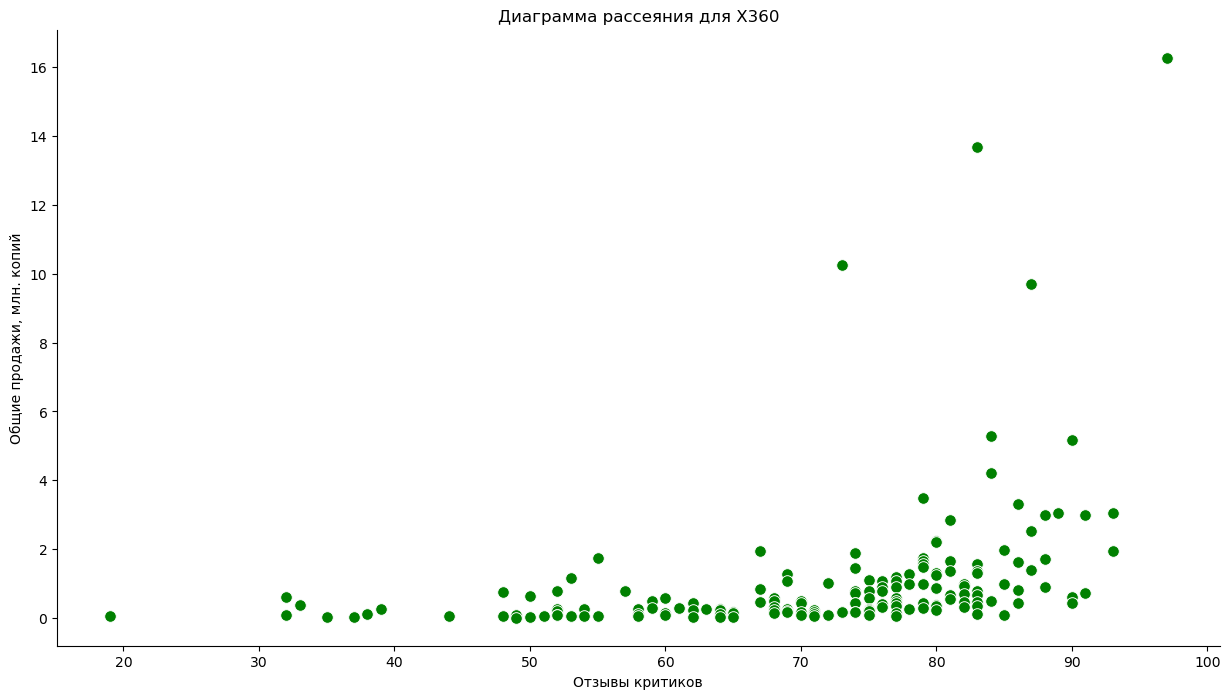

In [66]:
# Построим диаграмму рассеяния для отзывов критиков и продаж
platform_name = 'X360'
data = games_actual_cleaned[games_actual_cleaned['platform'] == platform_name]

plt.figure(figsize=(15, 8))
sns.scatterplot(data=data, x='critic_score', y='total_sales', color='green', s=70)
plt.title(f'Диаграмма рассеяния для {platform_name}')
plt.xlabel('Отзывы критиков')
plt.ylabel('Общие продажи, млн. копий')

sns.despine()
plt.show()

Можно сказать, что  не очень явная зависимость существует. Чем выше отзывы критиков, тем продаж больше.

In [67]:
# Посчитаем корреляцию между отзывами критиков и продажами
corr_critics_sales = data['total_sales'].corr(data['critic_score'])
print(f'Корреляция между отзывами критиков и продажами: {corr_critics_sales}')

Корреляция между отзывами критиков и продажами: 0.36057348885073387


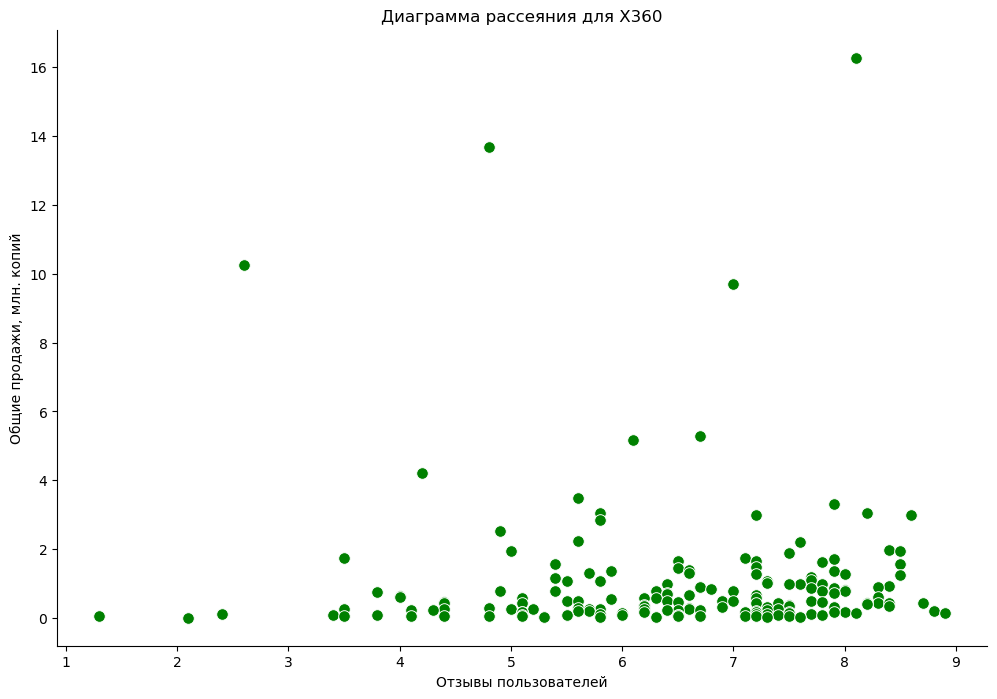

In [68]:
# Построим диаграмму рассеяния, показывающую зависимость продаж от отзывов пользователей
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='user_score', y='total_sales', color='green', s=70)
plt.title(f'Диаграмма рассеяния для {platform_name}')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Общие продажи, млн. копий')

sns.despine()
plt.show()

Тут не просвлеживается никакой зависимости. Посмотрим на корреляцию.

In [69]:
# Посчитаем корреляцию между отзывами пользователей и продажами
corr_users_sales = data['user_score'].corr(data['total_sales'])
print(f'Корреляция между отзывами пользователей и продажами: {corr_users_sales}')

Корреляция между отзывами пользователей и продажами: -0.0020140394826898196


Можно сделать вывод, что существует небольшая корреляция между отзывами критиков и продажами (коэффициент корреляции: 0.4). Между отзывами пользователей и продажами корреляции нет. Проверим, подтвердится ли этот вывод на других популярных платформах.

In [70]:
# Определим функцию для вычисления корреляции по платформам и построения диаграмм рассеяния
def corr_critics_users(platform_name):
    data = games_actual_cleaned[games_actual_cleaned['platform'] == platform_name]
    corr_critics_sales = data['total_sales'].corr(data['critic_score'])
    corr_users_sales = data['user_score'].corr(data['total_sales'])
    display(f'Корреляция между отзывами критиков и продажами для {platform_name}: {corr_critics_sales}',
    f'Корреляция между отзывами пользователей и продажами для {platform_name}: {corr_users_sales}' )
    
    # Построение диаграмм рассеяния

    plt.figure(figsize=(12, 8))
    
    sns.scatterplot(data=data, x='critic_score', y='total_sales', color='green', s=70)
    plt.title(f'Корреляция между отзывами критиков и продажами для {platform_name}')
    plt.xlabel('Отзывы критиков')
    plt.ylabel('Общие продажи, млн. копий')
    sns.despine()
    plt.show()
    
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=data, x='user_score', y='total_sales', color='green', s=70)
    plt.title(f'Корреляция между отзывами пользователей и продажами для {platform_name}')
    plt.xlabel('Отзывы пользователей')
    plt.ylabel('Общие продажи, млн. копий')

    sns.despine()
    plt.show()

'Корреляция между отзывами критиков и продажами для PS3: 0.33373969571508566'

'Корреляция между отзывами пользователей и продажами для PS3: 0.0014063866764553756'

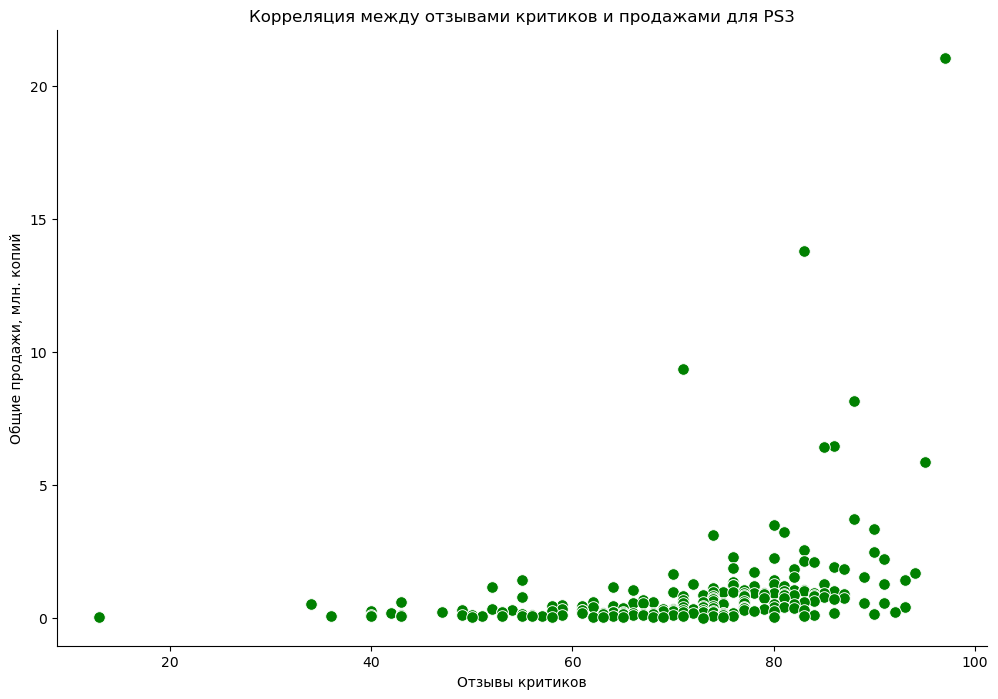

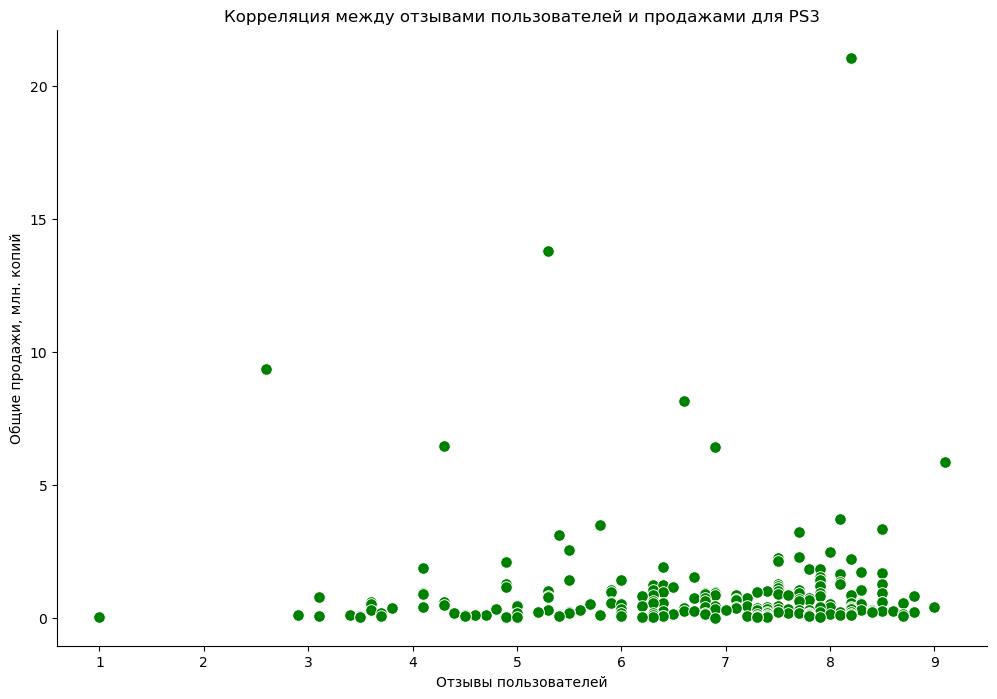

In [71]:
# Корреляция и визуализация для PS3
corr_critics_users('PS3')

'Корреляция между отзывами критиков и продажами для PS4: 0.40589480145836676'

'Корреляция между отзывами пользователей и продажами для PS4: -0.0336249759652888'

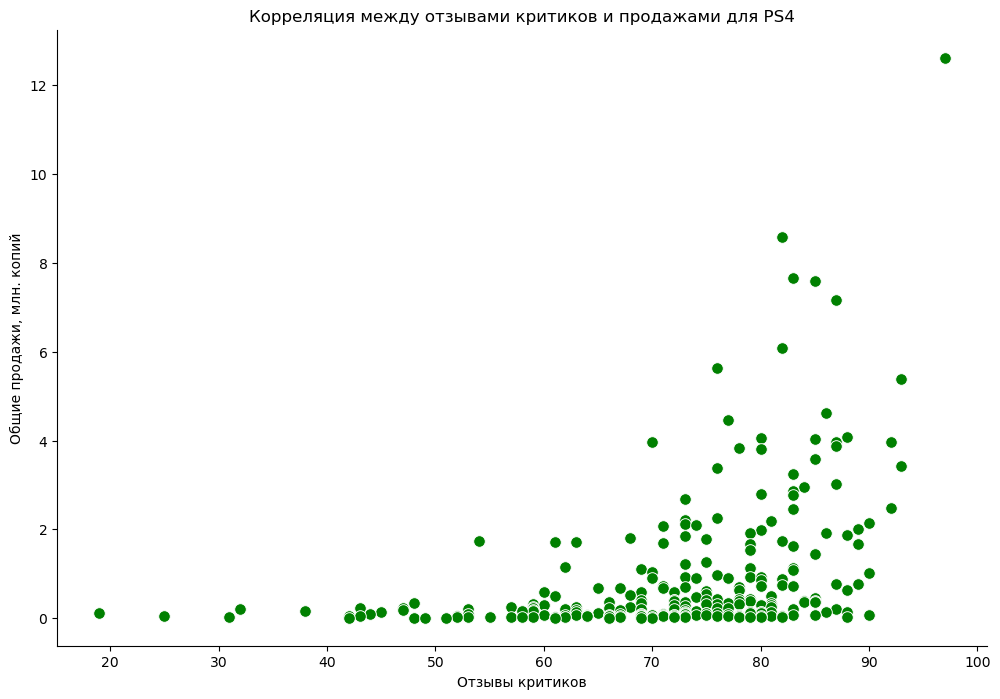

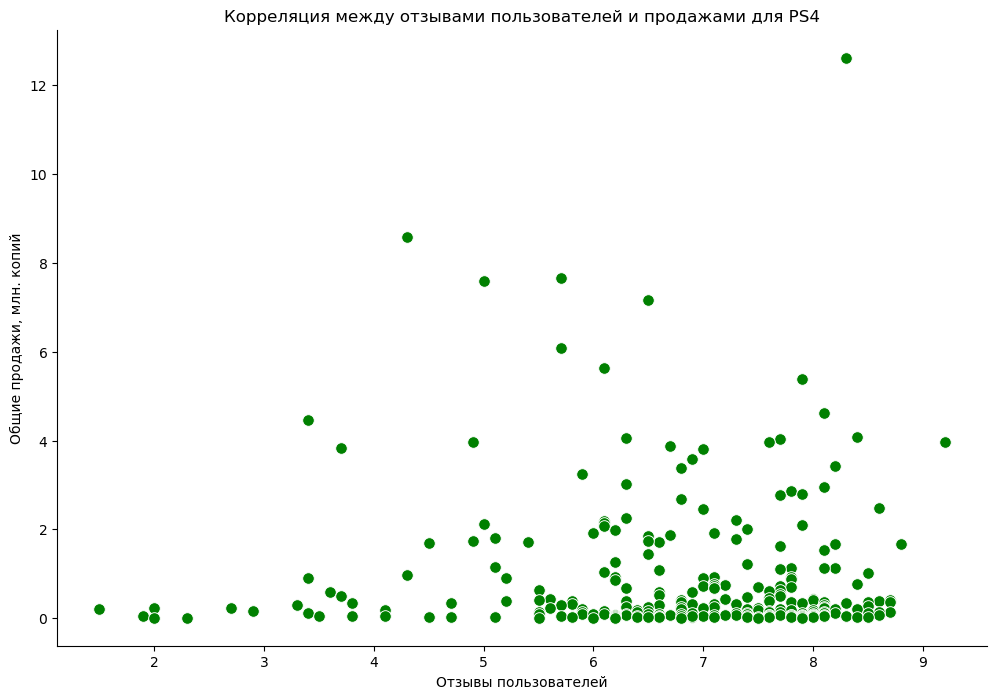

In [72]:
# Корреляция и визуализация для PS4
corr_critics_users('PS4')

'Корреляция между отзывами критиков и продажами для 3DS: 0.31055301915326294'

'Корреляция между отзывами пользователей и продажами для 3DS: 0.20181255007655283'

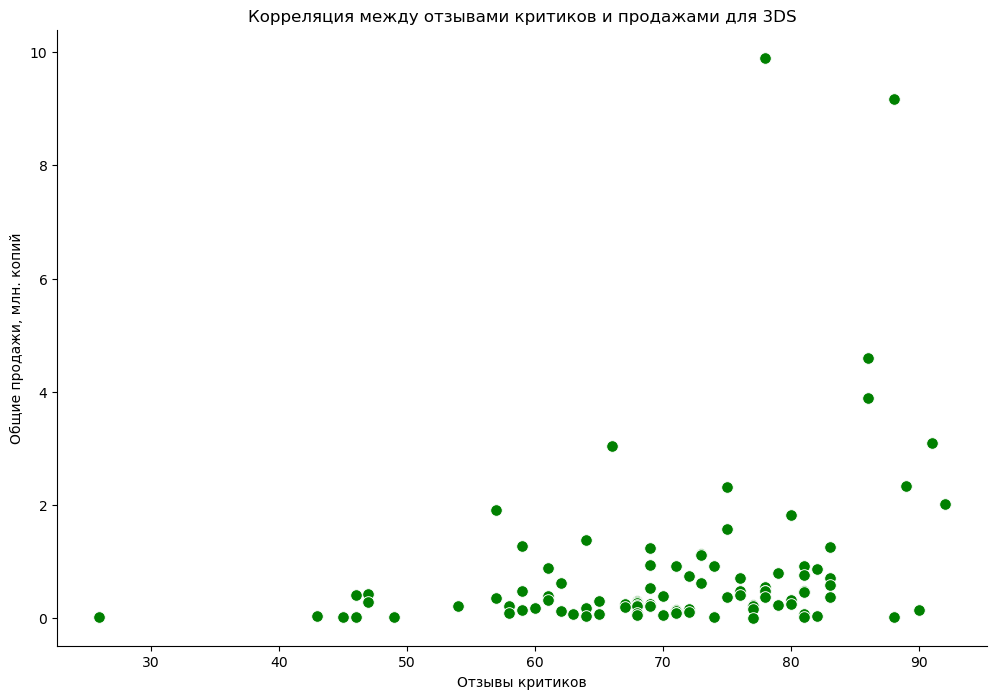

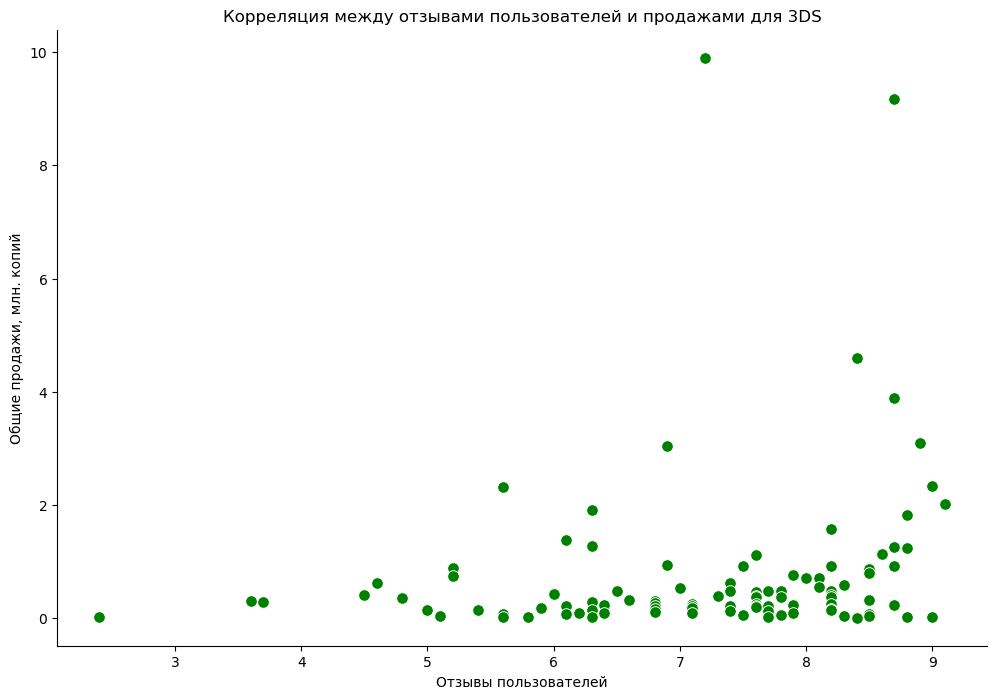

In [73]:
# Корреляция и визуализация для 3DS
corr_critics_users('3DS')

'Корреляция между отзывами критиков и продажами для XOne: 0.410422035612964'

'Корреляция между отзывами пользователей и продажами для XOne: -0.09400318326920859'

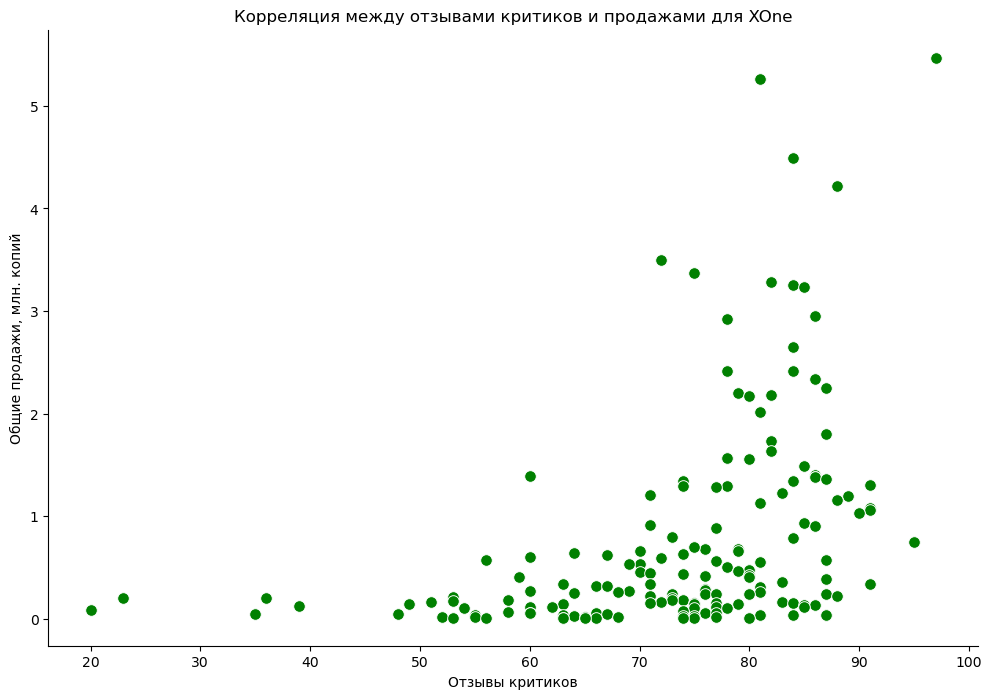

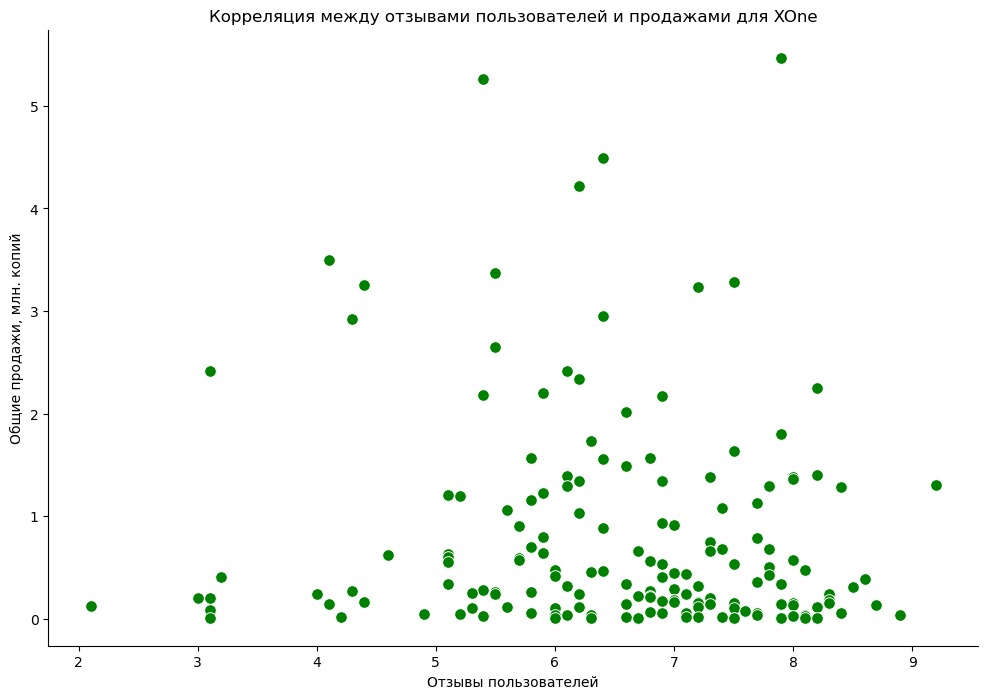

In [74]:
# Корреляция для XOne
corr_critics_users('XOne')

В целом, вывод подтверждается. Продажи зависят от мнения критиков о платформе, не зависят или зависят несильно от мнения покупателей, но интересно то, что по продукту компании Nintendo, корреляция продаж с отзывами пользователей выше, чем по другим платформам. Вероятно, играет роль японский менталитет...

### Исследование жанров за актуальный период

In [75]:
# Группируем данные по жанрам и смотрим, сколько игр в каждом из них
distribution_by_genre = games_actual.groupby('genre')['name'].count().reset_index()
distribution_by_genre = distribution_by_genre.sort_values(by='name', ascending=False)
distribution_by_genre

,genre,name
0,Action,1031
7,Role-Playing,370
1,Adventure,302
10,Sports,267
8,Shooter,235
3,Misc,192
6,Racing,115
2,Fighting,109
4,Platform,85
9,Simulation,80


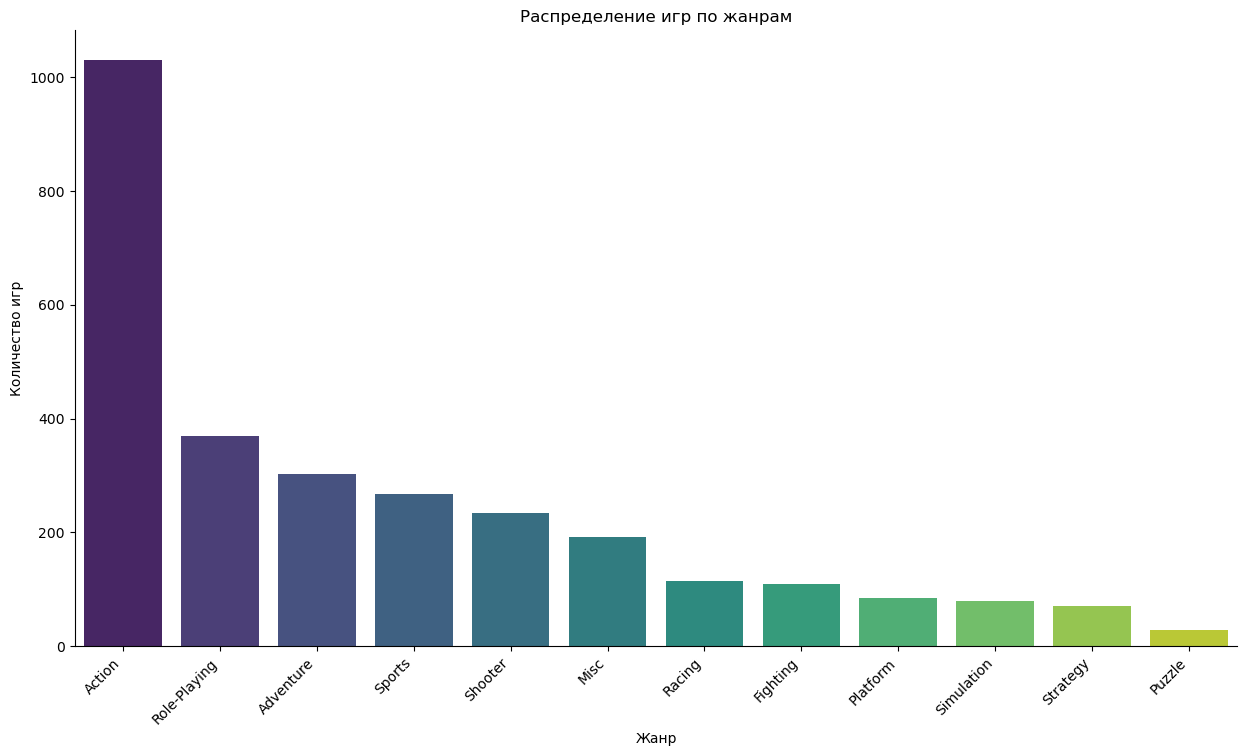

In [76]:
# Визуализируем распределение игр по жанрам
plt.figure(figsize=(15, 8))

sns.barplot(data=distribution_by_genre, x='genre', y='name', palette='viridis')
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.xticks(rotation=45, ha='right')

sns.despine()
plt.show()

Топ-5 самых популярных жанров это:
- Action;
- Role_Playing;
- Adventure;
- Sports;
- Shooter.

Больше всего игр в жанре "Action", самые непопулярные игры в жанре "Puzzle".

In [77]:
# Группируем данные по жанрам и считаем общие продажи
distribution_by_genre = games_actual.groupby('genre')['total_sales'].sum().reset_index()
distribution_by_genre = distribution_by_genre.sort_values(by='total_sales', ascending=False)
distribution_by_genre

,genre,total_sales
0,Action,441.1200
8,Shooter,304.7300
7,Role-Playing,192.8000
10,Sports,181.0700
3,Misc,85.0400
4,Platform,61.0000
6,Racing,53.5000
2,Fighting,44.4900
9,Simulation,35.1200
1,Adventure,29.4300


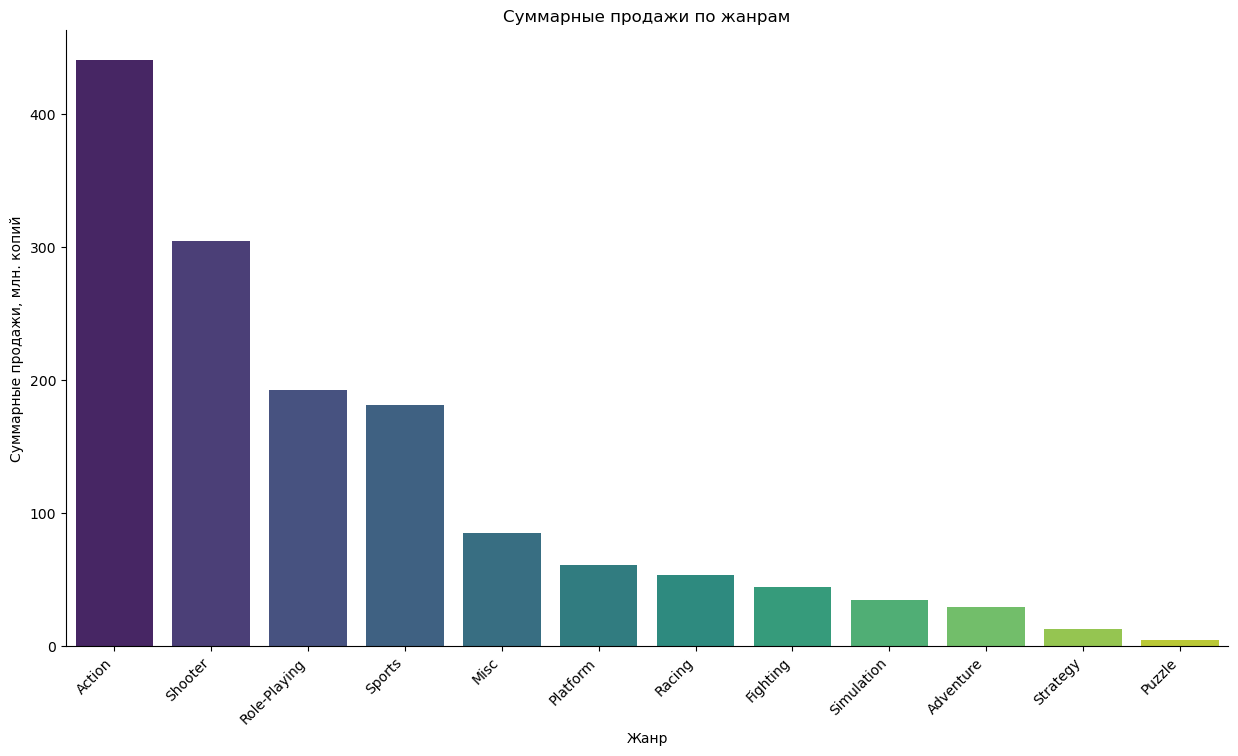

In [78]:
# Визуализируем распределение продаж по жанрам
plt.figure(figsize=(15, 8))

sns.barplot(data=distribution_by_genre, x='genre', y='total_sales', palette='viridis')
plt.title('Суммарные продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи, млн. копий')
plt.xticks(rotation=45, ha='right')

sns.despine()
plt.show()

Топ-5 самых прибыльных жанров это:
- Action;
- Shooter;
- Role-Playing;
- Sports;
- Misc.

Самые высокие продажи в  жанре Action, самые низкие у Puzzle.

По последним двум графикам мы видим определенные различия в топ-5, например "Shooter" попал в топ-5 по количеству игр на последнее место, а в топ-5 по продажам он на втором месте. Получается, что на продажи сильно влияет как количество игр, так и, возможно, качество (популярность). Посчитаем средние и медианные значения по продажам.

In [79]:
# Посчитаем средние значения суммарных продаж по жанрам
distribution_by_genre_mean = games_actual.groupby('genre')['total_sales'].mean().reset_index()
distribution_by_genre_mean = distribution_by_genre_mean.sort_values(by='total_sales', ascending=False)
distribution_by_genre_mean

,genre,total_sales
8,Shooter,1.2967
4,Platform,0.7176
10,Sports,0.6782
7,Role-Playing,0.5211
6,Racing,0.4652
3,Misc,0.4429
9,Simulation,0.4390
0,Action,0.4279
2,Fighting,0.4082
11,Strategy,0.1879


In [80]:
# Посчитаем медианные значения суммарных продаж по жанрам
distribution_by_genre_median = games_actual.groupby('genre')['total_sales'].median().reset_index()
distribution_by_genre_median = distribution_by_genre_median.sort_values(by='total_sales', ascending=False)
distribution_by_genre_median

,genre,total_sales
8,Shooter,0.4400
10,Sports,0.2400
4,Platform,0.2100
7,Role-Playing,0.1400
6,Racing,0.1400
2,Fighting,0.1300
0,Action,0.1200
3,Misc,0.1200
9,Simulation,0.1200
11,Strategy,0.0800


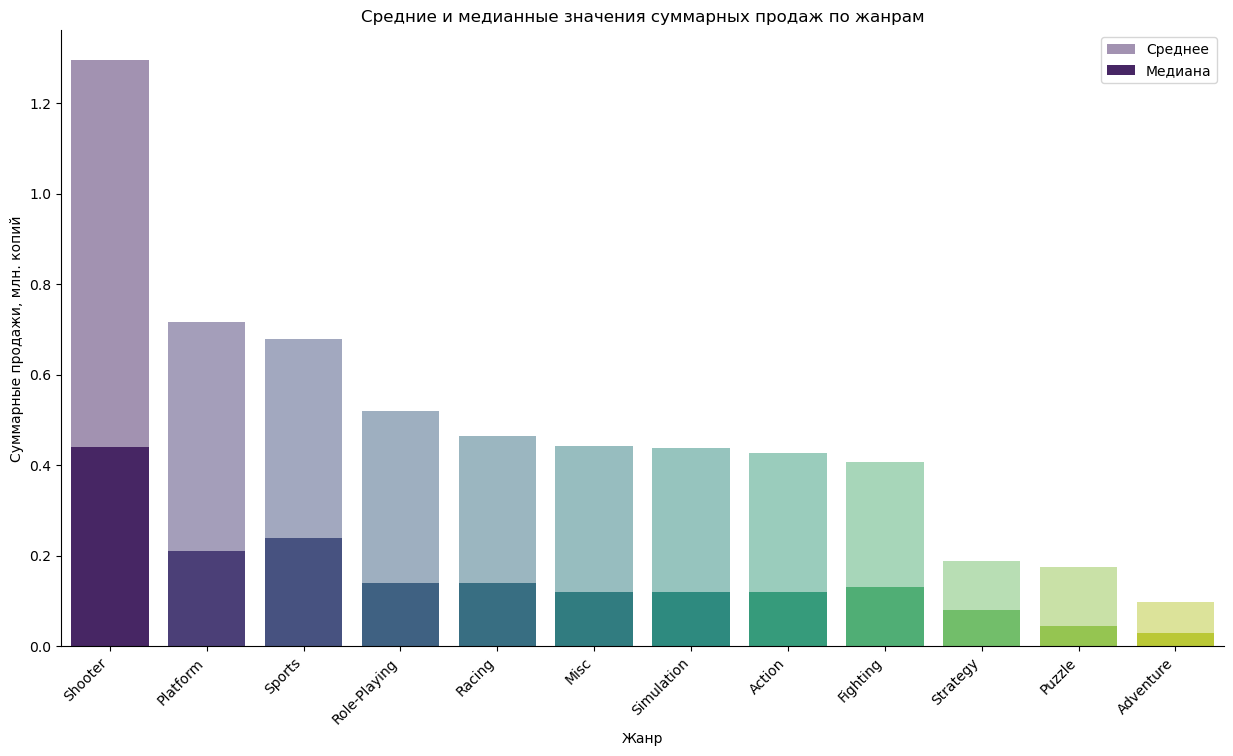

In [81]:
# Визуализируем полученный результат
fig, ax = plt.subplots(figsize=(15, 8))

# Объединяем данные
combined_data = pd.merge(distribution_by_genre_mean, distribution_by_genre_median, on='genre', 
                         suffixes=('_mean', '_median'))

# Строим график средних значений
sns.barplot(data=combined_data, x='genre', y='total_sales_mean', ax=ax, label='Среднее', alpha=0.5,
           palette='viridis')

# Строим график медианных значений
sns.barplot(data=combined_data, x='genre', y='total_sales_median', ax=ax, label='Медиана',
           palette='viridis')

ax.set_title('Средние и медианные значения суммарных продаж по жанрам')
ax.set_xlabel('Жанр')
ax.set_ylabel('Суммарные продажи, млн. копий')
ax.legend()
plt.xticks(rotation=45, ha='right')

sns.despine()
plt.show()

Итак, расклад изменился. Действительно, некоторые популярные игры, даже если их немного, могут приносить доход равнозначный другим жанрам, которые берут свое количеством игр. Топ-5 жанров:
- Shooter;
- Platform по среднему / Sports по медиане;
- Sports по среднему / Platform по медиане;
- Role_Playing;
- Racing. 

Самые высокие продажи в жанре "Shooter", самые низкие в "Adventure". 

Интересно посмотреть на топ-5 игр в разрезе данного исследования.

In [82]:
# Найдем топ-5 популярных игр продажам
games_actual.groupby(['name', 'genre'])['total_sales'].sum().nlargest(5).reset_index()

,name,genre,total_sales
0,Grand Theft Auto V,Action,56.5800
1,Call of Duty: Black Ops II,Shooter,29.4000
2,Call of Duty: Ghosts,Shooter,27.3900
3,Call of Duty: Black Ops 3,Shooter,25.6700
4,Minecraft,Misc,24.1600


In [83]:
# Посмотрим поближе на самую продаваемую игру
grand = games_actual.query('name=="Grand Theft Auto V"')
grand

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.0200,9.0900,0.9800,3.9600,97,8.2000,M,21.0500
23,Grand Theft Auto V,X360,2013,Action,9.6600,5.1400,0.0600,1.4100,97,8.1000,M,16.2700
42,Grand Theft Auto V,PS4,2014,Action,3.9600,6.3100,0.3800,1.9700,97,8.3000,M,12.6200
165,Grand Theft Auto V,XOne,2014,Action,2.8100,2.1900,0.0000,0.4700,97,7.9000,M,5.4700
1730,Grand Theft Auto V,PC,2015,Action,0.3900,0.6900,0.0000,0.0900,96,7.9000,M,1.1700


Игра выходила три года подряд на разных платформах, и была куплена 56.6 млн. раз.

In [84]:
# Найдем топ-5 популярных игр по количеству релизов
games_actual.groupby(['name', 'genre'])['year_of_release'].count().nlargest(5).reset_index()

,name,genre,year_of_release
0,FIFA 14,Sports,9
1,LEGO Marvel Super Heroes,Action,9
2,Angry Birds Star Wars,Strategy,8
3,FIFA 15,Sports,8
4,FIFA Soccer 13,Action,8


In [85]:
# Посмотрим поближе на самую популярную игру
fifa_14 = games_actual.query('name=="FIFA 14"')
fifa_14

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
126,FIFA 14,PS3,2013,Sports,0.7800,4.2400,0.0700,1.3700,86,4.3000,E,6.4600
271,FIFA 14,X360,2013,Sports,0.9200,2.8900,0.0100,0.4000,84,4.2000,E,4.2200
469,FIFA 14,PS4,2013,Sports,0.6100,1.8500,0.1100,0.4400,87,6.3000,E,3.0100
1753,FIFA 14,XOne,2013,Sports,0.4100,0.6600,0.0000,0.0900,88,5.8000,E,1.1600
4699,FIFA 14,PSV,2013,Sports,0.0800,0.2300,0.0100,0.0900,<NA>,1.8000,E,0.4100
4809,FIFA 14,PC,2013,Sports,0.0100,0.3600,0.0000,0.0300,87,4.6000,E,0.4000
4985,FIFA 14,Wii,2013,Sports,0.0000,0.3600,0.0000,0.0200,<NA>,4.3000,E,0.3800
6871,FIFA 14,3DS,2013,Sports,0.0000,0.2200,0.0000,0.0100,<NA>,NaN,Unknown,0.2300
7875,FIFA 14,PSP,2013,Sports,0.0000,0.1500,0.0000,0.0400,<NA>,3.4000,E,0.1900


In [86]:
# Посчитаем суммарные продажи по игре
fifa_14['total_sales'].sum()

16.46

Игра вышла в 2013 году сразу на 9 платформах, но сумма общих продаж у нее 16,5 млн. копий, в отличие от "Grand Theft Auto V". Все-таки мой вывод о том, что многое зависит от самой игры, а не от жанра или количества запусков, верный.

**Выводы:**

На данном этапе мы:
- провели исследование количества игр по годам;
- выяснили, что с 1980 до 1994 года на рынок выходило слишком мало игр - всего 486. Более менее существенный рост количества релизов начинается с 1995 года, пик приходится на период с 2007 по 2011 годы, затем в 2012 году происходит очень резкий спад практически в 2 раза. До 2016 года, на котором заканчиваются наши данные, роста выше данных 2012 года так и не случилось;
- наиболее популярными оказались платформы "PS2", "X360", "PS3", "Wii", "DS", "PS";
- "срок жизни" популярной платформы 10-12 лет;
- "срок популярности" любой платформы в среднем составляет 4-5 лет;
- рассчитали средний "срок жизни" всех платформ - 6 лет;
- судя по динамике продаж за последние 5 лет, "PS4" провалилась в продажах, единственная платформа, которая показала рост продаж с момента выхода - это "3DS", она же единственная сумела к 2016 году после череды падений с 2014 года показать какой-то небольшой рост. "X360" и "PS3" показали резкий скачок роста в 2012 - 2013 годах, затем продажи так же резко начали падать. "XOne", также как и "PS4" никакого роста в продажах не дала;
- по количеству продаж в мире лидирует "X360", на втором месте "PS4", на третьем "XOne". Это разрекламированные и ожидаемые платформы во всем мире, получается, что после старта продаж они приносят очень большую прибыль, потом продажи падают, но платформы с более стабильными продажами на рынке ("3DS") по прибыли не могут с ними сравниться;
- продажи зависят от мнения критиков о платформе, не зависят или зависят несильно от мнения покупателей, но интересно то, что по продукту компании Nintendo, корреляция продаж с отзывами пользователей выше, чем по другим платформам. Вероятно, играет роль японский менталитет.
- некоторые популярные игры, могут приносить доход равнозначный другим жанрам, которые берут свое количеством игр. Топ-5 жанров:
  - Shooter;
  - Platform по среднему / Sports по медиане;
  - Sports по среднему / Platform по медиане;
  - Role_Playing;
  - Racing. 
  
  Самые высокие продажи в жанре "Shooter", самые низкие в "Adventure".

<a id="4"></a>

## Портрет пользователя каждого региона

Посмотрим, как распределились платформы по популярности по регионам.

In [87]:
# Найдем топ-5 популярных платформ в NA
platforms_na = games_actual.groupby('platform')['na_sales'].sum().nlargest(5).reset_index()

# Добавим столбец с общими продажами total_sales для каждой платформы
platforms_na['total_sales'] = games_actual.groupby('platform')['total_sales'].sum()\
                              .loc[platforms_na['platform']].values

# Рассчитаем долю продаж каждой платформы в регионе от общего объема продаж 
platforms_na['share_of_sales'] = platforms_na['na_sales'] / platforms_na['total_sales'] * 100

platforms_na

,platform,na_sales,total_sales,share_of_sales
0,X360,140.0500,236.5400,59.2077
1,PS4,108.7400,314.1400,34.6151
2,PS3,103.3800,288.7900,35.7976
3,XOne,93.1200,159.3200,58.4484
4,3DS,55.3100,194.6100,28.4209


In [88]:
# Найдем топ-5 популярных платформ в EU
platforms_eu = games_actual.groupby('platform')['eu_sales'].sum().nlargest(5).reset_index()

# Добавим столбец с общими продажами total_sales для каждой платформы
platforms_eu['total_sales'] = games_actual.groupby('platform')['total_sales'].sum()\
                              .loc[platforms_eu['platform']].values

# Рассчитаем долю продаж каждой платформы в регионе от общего объема продаж 
platforms_eu['share_of_sales'] = platforms_eu['eu_sales'] / platforms_eu['total_sales'] * 100

platforms_eu

,platform,eu_sales,total_sales,share_of_sales
0,PS4,141.0900,314.1400,44.9131
1,PS3,106.8600,288.7900,37.0027
2,X360,74.5200,236.5400,31.5042
3,XOne,51.5900,159.3200,32.3814
4,3DS,42.6400,194.6100,21.9105


In [89]:
# Найдем топ-5 популярных платформ в JP
platforms_jp = games_actual.groupby('platform')['jp_sales'].sum().nlargest(5).reset_index()

# Добавим столбец с общими продажами total_sales для каждой платформы
platforms_jp['total_sales'] = games_actual.groupby('platform')['total_sales'].sum()\
                              .loc[platforms_jp['platform']].values

# Рассчитаем долю продаж каждой платформы в регионе от общего объема продаж 
platforms_jp['share_of_sales'] = platforms_jp['jp_sales'] / platforms_jp['total_sales'] * 100

platforms_jp

,platform,jp_sales,total_sales,share_of_sales
0,3DS,87.7900,194.6100,45.1107
1,PS3,35.2900,288.7900,12.2200
2,PSV,21.0400,49.1800,42.7816
3,PS4,15.9600,314.1400,5.0805
4,WiiU,13.0100,82.1900,15.8292


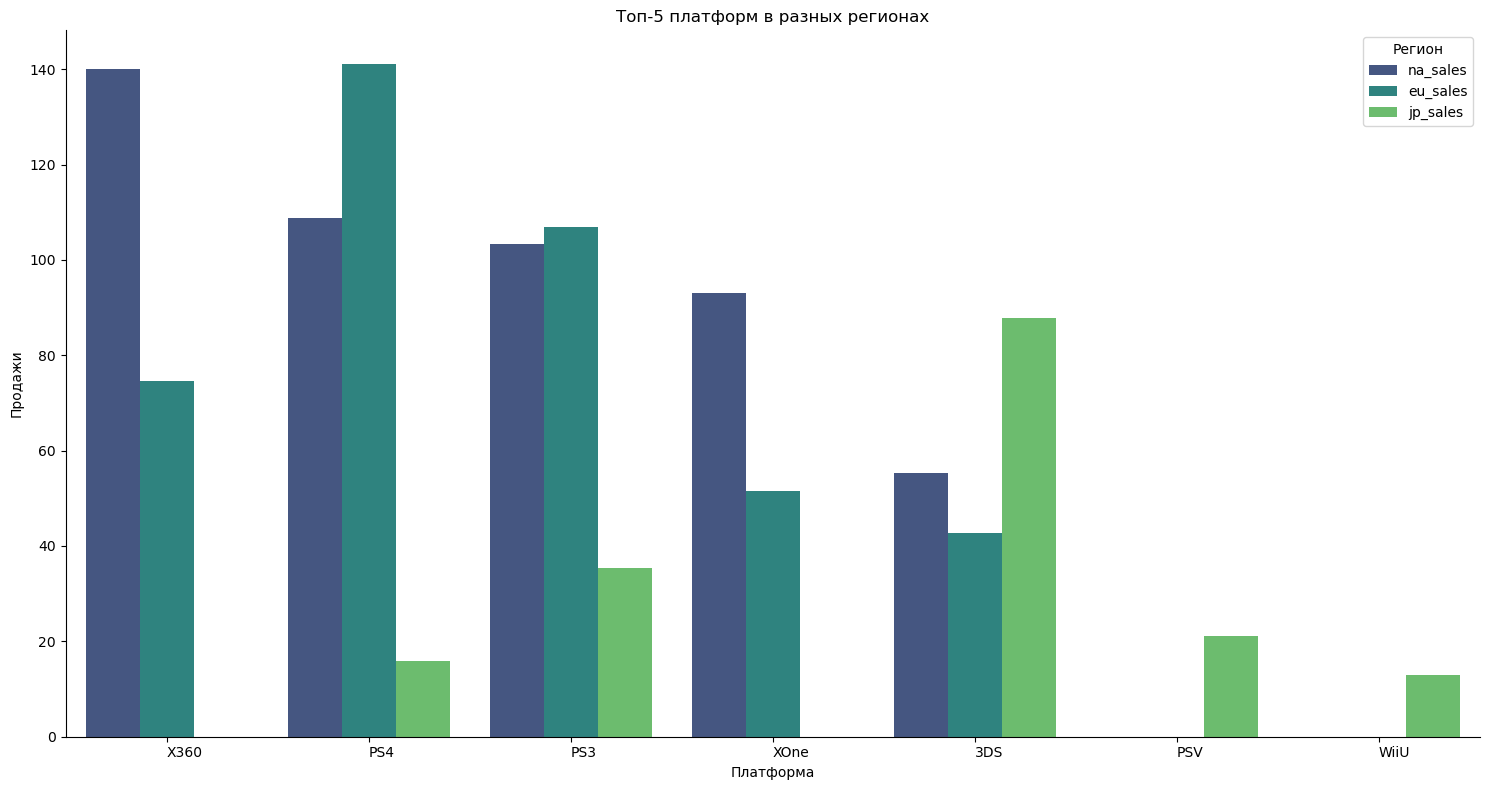

In [90]:
# Визуализируем полученные данные
# Объединяем данные
all_regions = pd.concat([platforms_na, platforms_eu, platforms_jp])

# Преобразуем данные с использованием melt
melted_data = pd.melt(all_regions, id_vars='platform', value_vars=['na_sales', 'eu_sales', 'jp_sales'], 
                      var_name='region', value_name='sales')

plt.figure(figsize=(15, 8))

sns.barplot(data=melted_data, x='platform', y='sales', hue='region', palette='viridis')

plt.title('Топ-5 платформ в разных регионах')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.legend(title='Регион')
plt.xticks(ha='left')

sns.despine()
plt.tight_layout()
plt.show()

- Интересная картина полyчается по Японии. 2 платформы популярны в Японии и совсем не популярны в Северной Америке и Европе ("PSV" и "WiiU"). Также очень популярна "3DS" (Nintendo 3DS). "3DS" (доля продаж - 45%) и "PSV" (PlayStation Vita, 43%) являются портативными игровыми консолями. Эти устройства разработаны для игр в движении и предоставляют возможность игрокам наслаждаться играми в любом месте. Домашнии игровые консоли "PS3" (PlayStation 3 Sony) и "PS4" (PlayStation 4 Sony) по продажам отличается от других регионов более, чем в 3 раза в меньшую сторону. Эти факты позволяют предположить, что японцы не любят сидеть дома, или не любят тратить свободное время дома на игру, может быть играют в транспорте по  дороге на работу/учебу, в обеденный перерыв и т.д;
- во всех регионах представлены две домашние игровые консоли ("PS3" и "PS4") и одна портативная - "3DS", лучше всего она продавалась в Японии (доля продаж - 45% от общемировых), затем в Северной Америке (28%) и Европе (22%). И "PS3" и "PS4" лучше весго продавались в Европе (37% и 45%), в Америке - 36% и 35%.
- "X360" (Xbox 360 - домашняя игровая консоль от Microsoft) очень хорошо продавалась в Америке (59% от общемировых продаж) и почти в два раза хуже в Европе (32%);
- "XOne" (Xbox One - домашняя игровая консоль от Microsoft, преемница "X360") в Северной Америке обогнала по продажам Европу (58% и 32%, соответственно).

Посмотрим как распределились жанры по популярности по регионам.

In [91]:
# Определим функцию, которая найдет топ-5 жанров по регионам, их среднее, медиану и нарисует таблицы с выводом
def genres_distribution_by_region_viz(data, col1, col2):
    # Найдем топ-5 популярных жанров в регионе по сумме продаж
    genres_col2 = games_actual.groupby(col1)[col2].sum().nlargest(5).reset_index()

    # Найдем топ-5 популярных жанров в регионе по среднему значению
    genres_col2_mean = games_actual.groupby(col1)[col2].mean().nlargest(5).reset_index()

    # Найдем топ-5 популярных жанров в регионе по медиане
    genres_col2_median = games_actual.groupby(col1)[col2].median().nlargest(5).reset_index()

    # Ограничим вывод двумя знаками после запятой
    genres_col2 = genres_col2.applymap(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else x)
    genres_col2_mean = genres_col2_mean.applymap(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else x)
    genres_col2_median = genres_col2_median.applymap(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else x)

    # Отображаем таблицы
    fig, ax = plt.subplots(figsize=(15, 5))

    # Таблица genres_col2
    ax.table(cellText=genres_col2.values,
         colLabels=genres_col2.columns,
         cellLoc='center', loc='upper left', bbox=[0, 0, 0.3, 1], 
         colColours=sns.color_palette('viridis', len(genres_col2.columns)), fontsize=12)
    plt.text(0.09, 1.03, 'Table: genres_col2', transform=ax.transAxes, fontsize=14)
    
    
    # Таблица genres_col2_mean
    ax.table(cellText=genres_col2_mean.values,
         colLabels=genres_col2_mean.columns,
         cellLoc='center', loc='upper left', bbox=[0.35, 0, 0.3, 1], 
         colColours=sns.color_palette('viridis', len(genres_col2_mean.columns)), fontsize=12)
    plt.text(0.41, 1.03, 'Table: genres_col2_mean', transform=ax.transAxes, fontsize=14)

    # Таблица genres_col2_median
    ax.table(cellText=genres_col2_median.values,
         colLabels=genres_col2_median.columns,
         cellLoc='center', loc='upper left', bbox=[0.7, 0, 0.3, 1], 
         colColours=sns.color_palette('viridis', len(genres_col2_median.columns)), fontsize=12)
    plt.text(0.75, 1.03, 'Table: genres_col2_median', transform=ax.transAxes, fontsize=14)

    # Убираем оси
    ax.axis('off')

    plt.show()

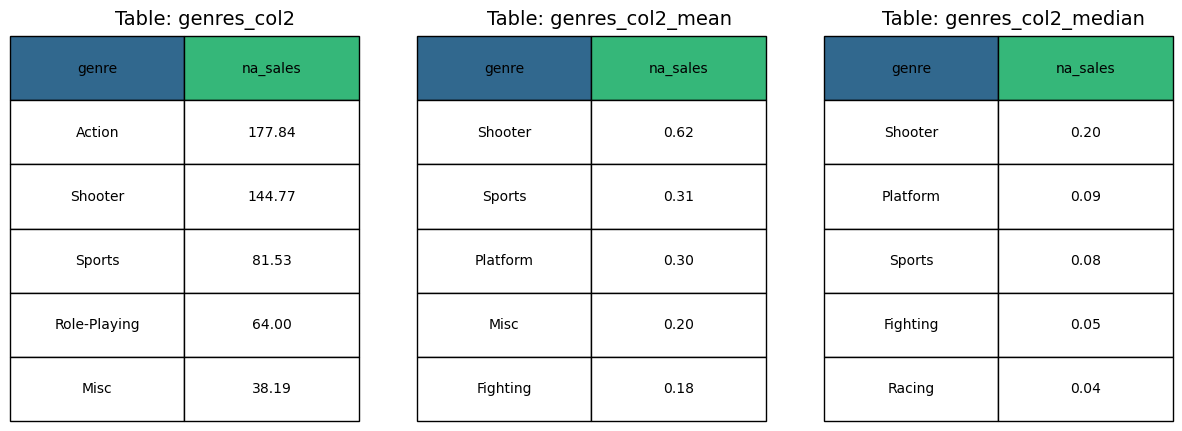

In [92]:
# Регион NA
genres_distribution_by_region_viz(games_actual, 'genre', 'na_sales')

Мы видим, что если выбирать жанры не по сумме продаж, а по среднему и медиане, то есть существенные различия в топ-5:
- Shooter;
- Sports по среднему / Platform по медиане;
- Platform по среднему / Sports по медиане;
- Misc по среднему / Fighting по медиане ;
- Fighting по среднему / Racing по медиане.

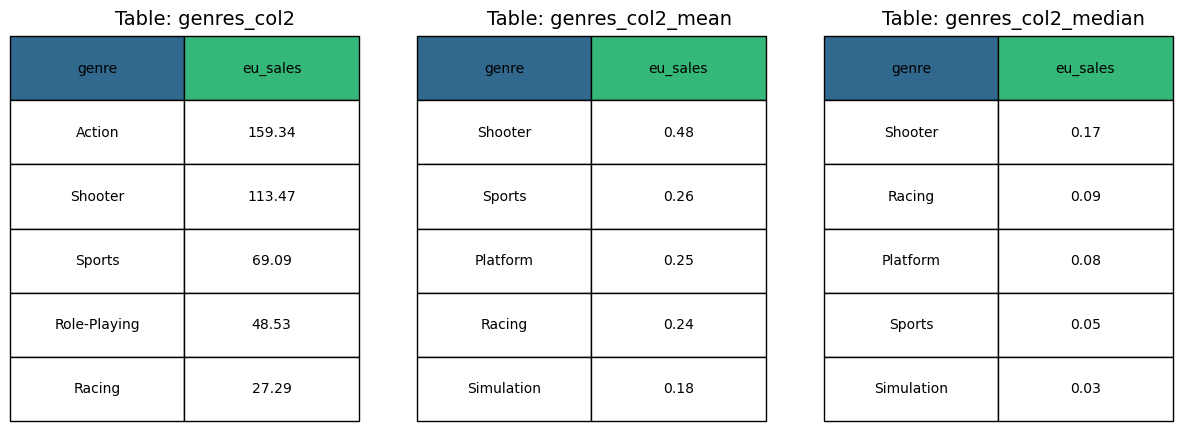

In [93]:
# Регион EU
genres_distribution_by_region_viz(games_actual, 'genre', 'eu_sales')

В Европе жанры распределились следующим образом:
- Shooter;
- Sports по среднему / Racing по медиане;
- Platform;
- Racing по среднему / Sports по медиане ;
- Simulation.

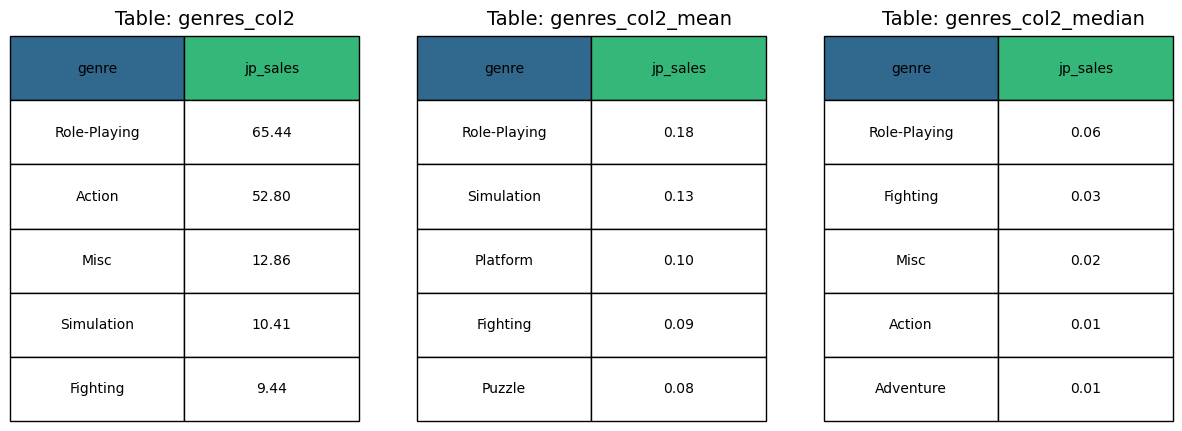

In [94]:
# Регион JP
genres_distribution_by_region_viz(games_actual, 'genre', 'jp_sales')

В Японии жанры распределились следующим образом:
- Role_playing;
- Simulation по среднему /Fighting по медиане;
- Platform по среднему / Misc по медиане;
- Fighting по среднему / Action по медиане;
- Puzzle gjchtlytve / Adventure по медиане;


Разница в топ-5 жанров по регионам очевидна. Верояно, дело в менталитете. В Японии топ-5 очень сильно отличается от Европы и Северной Америки. Если в Японии на первом месте Role_playing, то в Европе и Северной Америке Shooter. Плохая тенденция какая-то. Не зря японцы keen on "Гарри Поттер", "Властелин колец" и т.д. Для них мир сказок, персонажей, прохождения квестов, приключений, пазлов предпочтительнее обычных "стрелялок".

Проверим, влияет ли рейтинг ESRB на продажи в каждом регионе.

In [95]:
# Посчитаем, сумму продаж игр с каждым рейтингом  по регионам
rating_sales_by_region = games_actual.groupby('rating').agg({'na_sales':'sum', 
                                                             'eu_sales':'sum', 'jp_sales':'sum'}).reset_index()
rating_sales_by_region = rating_sales_by_region.sort_values(by='na_sales', ascending=False)
rating_sales_by_region

,rating,na_sales,eu_sales,jp_sales
2,M,231.5700,193.9600,21.2000
0,E,114.3700,113.0300,28.3300
4,Unknown,103.3100,91.5000,108.8400
1,E10+,75.7000,55.3700,8.1900
3,T,66.0200,52.9600,26.0200


In [96]:
# Определим функцию, которая на выводе  построит диаграмму рассеяния по рейтингам для каждого региона,
# выведет топ-5 рейтингов по региону и посчитает корреляцию между рейтингами и продажами по региону
def rating_sales_corr(data, col1, col2):
    
    # Построим диаграмму рассеяния для рейтингов  и продаж в регионе
    region = col2
    plt.figure(figsize=(15, 8))
    sns.scatterplot(data=data, x=col1, y=region, color='green', s=70)
    plt.title(f'Диаграмма рассеяния для {region}')
    plt.xlabel('Рейтинг')
    plt.ylabel('Общие продажи, млн. копий')

    sns.despine()
    plt.show()
    
    # Топ-5 рейтингов по региону 
    top_ratings = data.groupby(col1)[region].sum().nlargest(5).reset_index()
    print(f'Топ-5 рейтингов по {region}:')
    display(top_ratings)
    
    # Посчитаем корреляцию между рейтингами  и продажами по региону с помощью матрицы phik
    data_copy = data.copy()

    le = LabelEncoder()

    # Преобразуем категориальные значения в столбце rating  в числовой формат
    data_copy[col1] = le.fit_transform(data_copy[col1])

    # Рассчитаем корреляцию с использованием phik
    corr_matrix = data_copy[[col1, col2]].phik_matrix(interval_cols=[col1, col2])

    # Выведем корреляцию между рейтингами и продажами по региону
    print(f'Корреляция между рейтингами и продажами по {region} (phik):')
    display(corr_matrix)

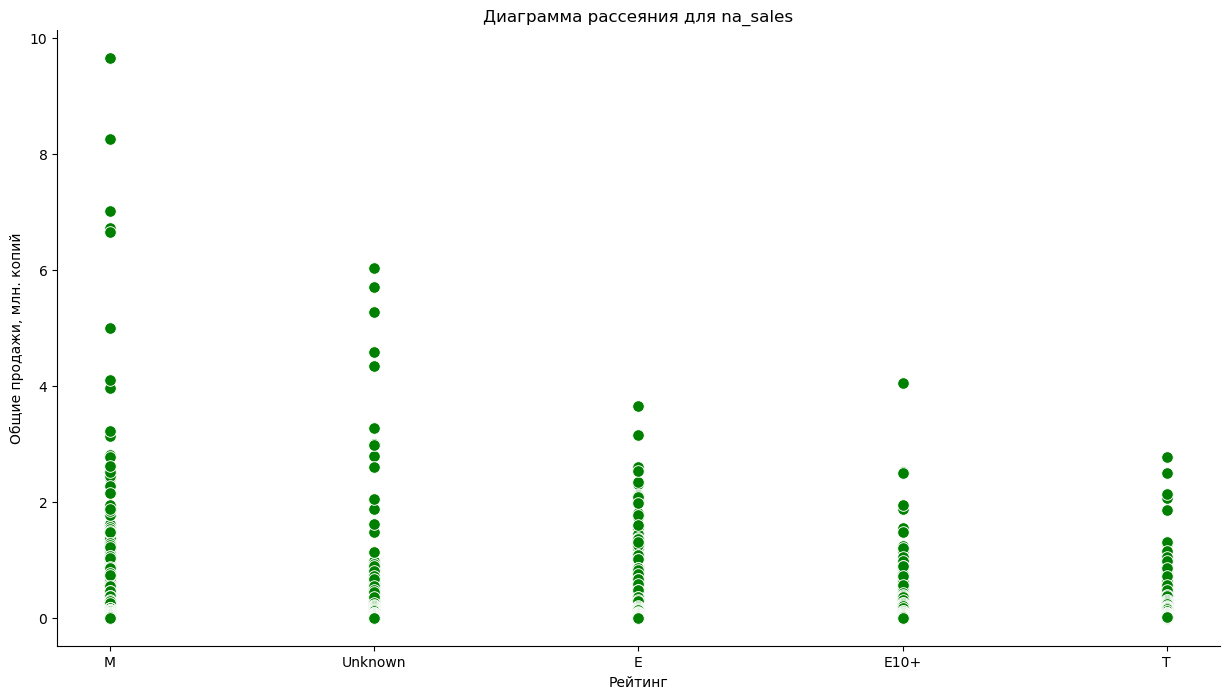

Топ-5 рейтингов по na_sales:


,rating,na_sales
0,M,231.5700
1,E,114.3700
2,Unknown,103.3100
3,E10+,75.7000
4,T,66.0200


Корреляция между рейтингами и продажами по na_sales (phik):


,rating,na_sales
rating,1.0000,0.2196
na_sales,0.2196,1.0000


In [97]:
# Влияние рейтинга ESRB на продажи в регионе NA
rating_sales_corr(games_actual, 'rating', 'na_sales')

Существует слабая положительная корреляция (0.2196) между рейтингами и продажами в регионе NA. Вероятно, более всего на продажи влияют два рейтинга "M" («Mature» — «Для взрослых») и "E" («Everyone» — «Для всех»). Также интересно, что третье место занимает наша "заглушка" - игры без рейтинга. Игры без рейтинга могут вызывать определенные сомнения у покупателей, и некоторые из них могут предпочесть избегать таких игр. Некоторые платформы и регионы могут требовать наличие рейтинга для продажи игр. В случае отсутствия рейтинга игра может быть ограничена в распространении и продажах. В некоторых случаях отсутствие рейтинга может свидетельствовать о том, что игра не была оценена из-за низкого качества или отсутствия интереса со стороны обозревателей. Это может отразиться на ее коммерческом успехе. Для планирования рекламных компаний на 2017 год следует учитывать такие игры.

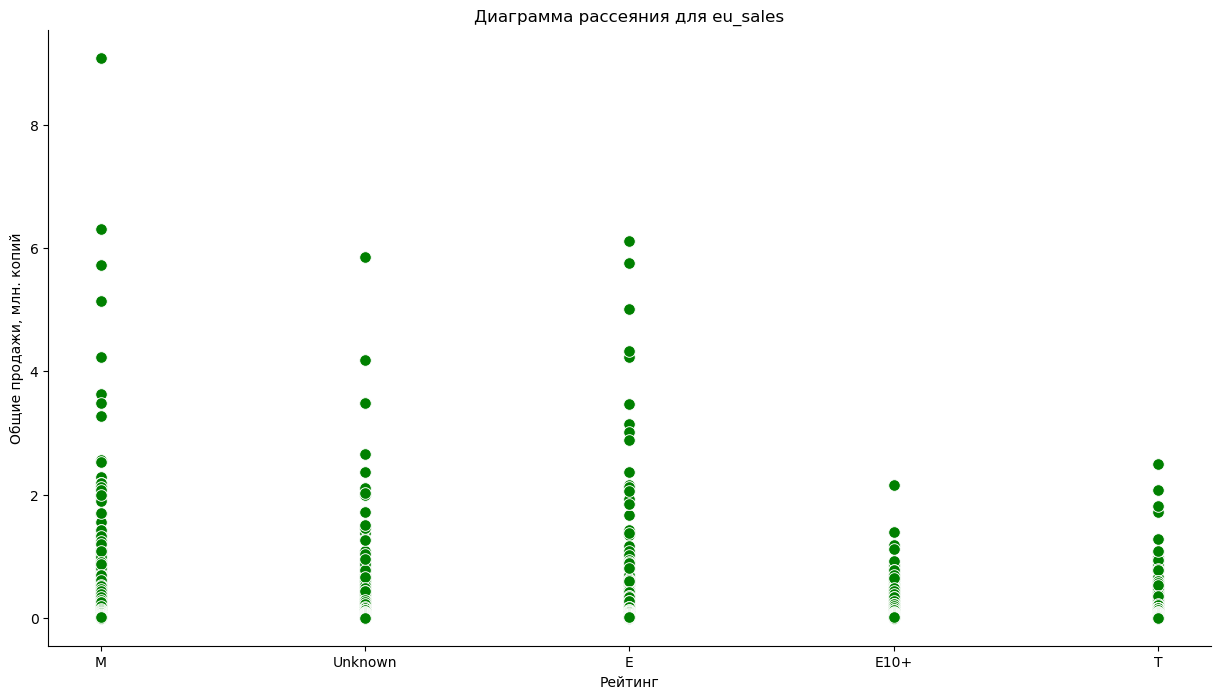

Топ-5 рейтингов по eu_sales:


,rating,eu_sales
0,M,193.9600
1,E,113.0300
2,Unknown,91.5000
3,E10+,55.3700
4,T,52.9600


Корреляция между рейтингами и продажами по eu_sales (phik):


,rating,eu_sales
rating,1.0000,0.1261
eu_sales,0.1261,1.0000


In [98]:
# Влияние рейтинга ESRB на продажи в регионе EU
rating_sales_corr(games_actual, 'rating', 'eu_sales')

В регионе EU также существует слабая положительная корреляция (0.1261) между рейтингами и продажами. Вероятно, более всего на продажи влияют два рейтинга "M" («Mature» — «Для взрослых») и "E" («Everyone» — «Для всех»). И игыр без рейтинга.

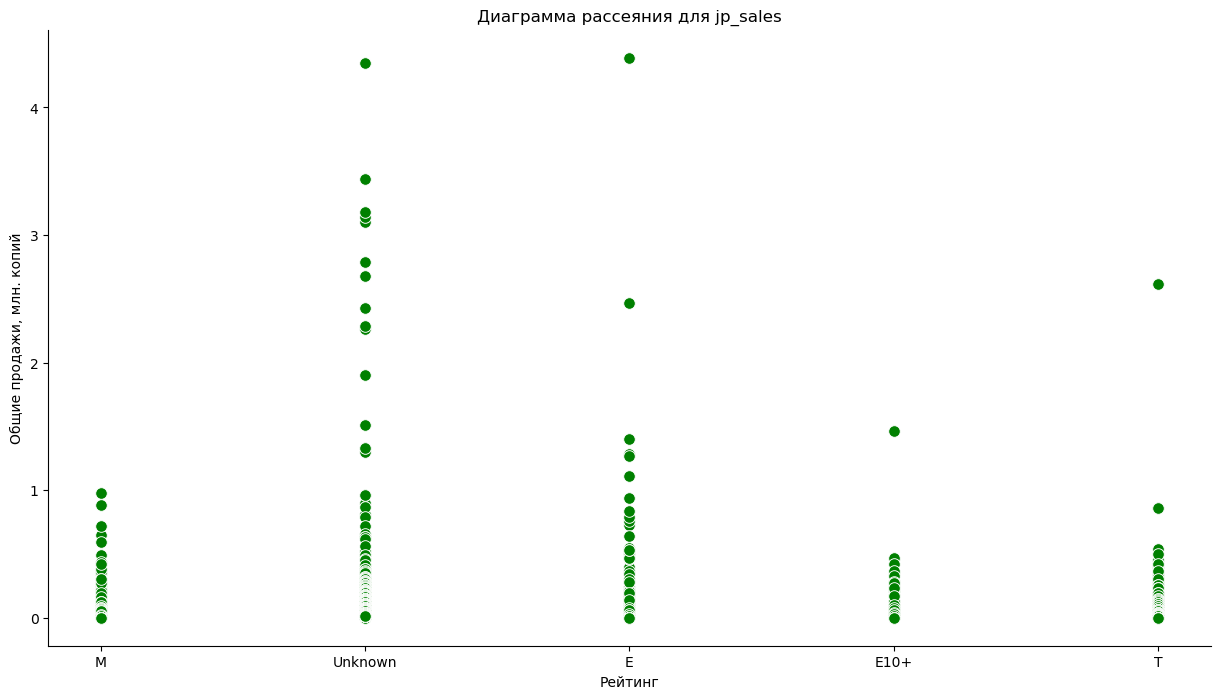

Топ-5 рейтингов по jp_sales:


,rating,jp_sales
0,Unknown,108.8400
1,E,28.3300
2,T,26.0200
3,M,21.2000
4,E10+,8.1900


Корреляция между рейтингами и продажами по jp_sales (phik):


,rating,jp_sales
rating,1.0000,0.0336
jp_sales,0.0336,1.0000


In [99]:
# Влияние рейтинга ESRB на продажи в регионе JP
rating_sales_corr(games_actual, 'rating', 'jp_sales')

А вот в регионе JP особой зависимости между рейтингами ESRB и продажами игр нет (коэффициент корреляции - 0.0336). Большая часть игр идет без этого рейтинга. Вероятно, потому что ESRB - организация, в большей степени работающая на рынок США и Канады.

**Выводы:**

На данном этапе мы:
- проанализировали данные о платформах, жанрах и рейтингах по регионам;
- в Северной Америке и  Европе во многом схожая картина, ситуация в Японии совсем иная;
- портреты пользователей по регионам:
  - портрет пользователя региона NA:
    - пользователи предпочитают домашние игровые консоли, такие как "X360" (Xbox 360, Microsoft, 69% от общемировых продаж), "XOne (Xbox One, Microsoft, 58%), "PS3" (PlayStation 3, Sony, 36%);
    - среди популярных жанров лидируют такие как:
      - Shooter;
      - Sports/Platform;
      - Platform/Sports;
      - Misc/Fighting;
      - Fighting/Racing.
    - на выбор консоли могут оказывать влияние отзывы критиков;
    - существует очень слабая зависимость выбора игры от рейтинга ESRB (коэффициент корреляции: 0.22, в основном в категории "M" («Mature» — «Для взрослых») и "Е" («Everyone» — «Для всех»)), также много игр без рейтинга. Игры без рейтинга могут вызывать определенные сомнения у покупателей, и некоторые из них могут предпочесть избегать таких игр. Некоторые платформы и регионы могут требовать наличие рейтинга для продажи игр. В случае отсутствия рейтинга игра может быть ограничена в распространении и продажах. В некоторых случаях отсутствие рейтинга может свидетельствовать о том, что игра не была оценена из-за низкого качества или отсутствия интереса со стороны обозревателей. Это может отразиться на ее коммерческом успехе. Для планирования рекламных компаний на 2017 год следует учитывать такие игры;
  - портрет пользователя региона EA:
    - пользователи  предпочитают домашние игровые консоли, такие как "PS4" (PlayStation 4, Sony, 45%) и "PS3" (PlayStation 3, Sony, 37%);
    - среди популярных жанров лидируют такие как:
      - Shooter;
      - Sports/Racing;
      - Platform;
      - Racing/Sports;
      - Simulation.
    - на выбор консоли могут оказывать влияние отзывы критиков;
    - существует очень слабая зависимость выбора игры от рейтинга ESRB (коэффициент корреляции: 0.13, в основном в категории "M" («Mature» — «Для взрослых») и "Е" («Everyone» — «Для всех»)), на третьем месте игры без рейтинга;
  - портрет пользователя региона JP:
    - 2 платформы популярны в Японии и совсем не популярны в Северной Америке и Европе ("PSV" и "WiiU"). Также очень популярна "3DS" (Nintendo 3DS). "3DS" (доля продаж - 45%) и "PSV" (PlayStation Vita, 43%) являются портативными игровыми консолями. Эти устройства разработаны для игр в движении и предоставляют возможность игрокам наслаждаться играми в любом месте. Домашнии игровые консоли "PS3" (PlayStation 3 Sony) и "PS4" (PlayStation 4 Sony) по продажам отличается от других регионов более, чем в 3 раза в меньшую сторону. Эти факты позволяют предположить, что японцы не любят сидеть дома, или не любят тратить свободное время дома на игру, может быть играют в транспорте по  дороге на работу/учебу, в обеденный перерыв и т.д;
    - среди популярных жанров лидируют такие как:
      - Role_playing;
      - Simulation/Fighting;
      - Platform/Misc;
      - Fighting/Action;
      - Puzzle/Adventure.
    - топ-5 очень сильно отличается от Европы и Северной Америки. Если в Японии на первом месте Role_playing, то в Европе и Северной Америке Shooter. Плохая тенденция какая-то. Не зря японцы keen on "Гарри Поттер", "Властелин колец" и т.д. Для них мир сказок, персонажей, прохождения квестов, приключений и пазлов предпочтительнее обычных "стрелялок".
    - на выбор консоли могут оказывать влияние как отзывы критиков, так и (в меньшей степени) отзывы пользователей;
    - никакой явной зависимости между рейтингами ESRB и продажами игр нет (коэффициент корреляции - 0.03). Большая часть игр идет без этого рейтинга. Вероятно, потому что ESRB - организация, в большей степени работающая на рынок США и Канады.

<a id="5"></a>

## Проверка гипотез

Для проверки гипотезы необходимо сформулировать нулевую и альтернативную гипотезы. Они формулируются в зависимости от конкретной задачи и вопроса, который мы хотим исследовать. Обычно нулевая гипотеза формулируется так, чтобы предполагать отсутствие эффекта или различий. Альтернативная гипотеза, напротив, предполагает наличие какого-то эффекта или различий и является тем утверждением, которое мы пытаемся подтвердить с использованием статистического теста.

В результате статистического теста, если p-value меньше уровня значимости (для аналитики обычно выбирают 0.05), то мы можем отвергнуть нулевую гипотезу в пользу альтернативной. В противном случае мы не имеем оснований отвергнуть нулевую гипотезу.

### Первая гипотеза
*Средние пользовательские рейтинги платформ "Xbox One" и "PC" одинаковые.*

Нулевая гипотеза (H0): средние пользовательские рейтинги платформ "Xbox One" и "PC" одинаковые.

Альтернативная гипотеза (H1): средние пользовательские рейтинги платформ "Xbox One" и "PC" различаются.

In [100]:
# Найдем соотношение пользовательских рейтингов платформ "Xbox One" и "PC" в датасете
sample_size = games_actual.query('platform == "XOne" | platform == "PC"').groupby('platform')\
                       ['user_score'].count().reset_index()
sample_size['%_from_total'] = round(((sample_size['user_score'] / sample_size['user_score'].sum()) * 100),1)
sample_size

,platform,user_score,%_from_total
0,PC,206,53.1000
1,XOne,182,46.9000


Размеры выборок у нас сильно отличаются, что не очень хорошо.

In [101]:
# Сделаем срезы с выборками для проведения тестирования гипотезы
x_one = games_actual.query('platform=="XOne"')['user_score']
pc = games_actual.query('platform=="PC"')['user_score']

In [102]:
# Проверим обе выборки на пропуски
print(f'XOne: {x_one.isna().sum()}')
print(f'PC: {pc.isna().sum()}')

XOne: 65
PC: 44


In [103]:
# Удалим пропуски перед тестированием
x_one = x_one.dropna()
pc = pc.dropna()

Используем t-тест для сравнения средних, поскольку у нас есть две независимые выборки (рейтинги пользователей для платформ "Xbox One" и "PC"), и мы хотим проверить гипотезу о равенстве их средних.

В данном случае, используется t-тест с параметром equal_var=False, так как мы не предполагаем равенство дисперсий в двух выборках.

In [104]:
# Проверим данную гипотезу, используем метод st.ttest_ind

alpha = 0.05 # уровень статистической значимости, если p-value окажется меньше него, то отвергнем гипотезу

results1 = st.ttest_ind(x_one, pc, equal_var=False)
print(f'pvalue: {results1.pvalue}')

if results1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

pvalue: 0.5489537965134912
Нет оснований отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что нулевая гипотиза не может быть отвергнута, поэтому вероятно, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы. Проверим это.

In [105]:
# Посмотрим на средние рейтинги пользователей по этим платформам
print(f'Средний рейтинг пользователей игр на платформе Xbox One: {round(x_one.mean(),3)}')
print(f'Средний рейтинг пользователей игр на платформе PC: {round(pc.mean(),3)}')

Средний рейтинг пользователей игр на платформе Xbox One: 6.521
Средний рейтинг пользователей игр на платформе PC: 6.429


Так и есть, с учетом того, что размеры выборок были не равны, мы получили практически равные средние пользовательских рейтингов для "XOne" и для "PC". 

### Вторая гипотеза
*Средние пользовательские рейтинги жанров "Action" и "Sports" разные.*

Нулевая гипотеза (H0): средние пользовательские рейтинги жанров "Action" и "Sports" равны.

Альтернативная гипотеза (H1): средние пользовательские рейтинги жанров "Action" и "Sports" различаются.

In [106]:
# Найдем соотношение пользовательских рейтингов жанров "Action" и "Sports" в датасете
sample_size_1 = games_actual.query('genre == "Action" | genre == "Sports"').groupby('genre')\
                       ['user_score'].count().reset_index()
sample_size_1['%_from_total'] = round(((sample_size_1['user_score'] / sample_size_1['user_score'].sum()) * 100),1)
sample_size_1

,genre,user_score,%_from_total
0,Action,523,72.9000
1,Sports,194,27.1000


И снова у нас разные выборки по размеру.

In [107]:
# Сделаем срезы с выборками для проведения тестирования гипотезы
action = games_actual.query('genre=="Action"')['user_score']
sports = games_actual.query('genre=="Sports"')['user_score']

In [108]:
# Проверим обе выборки на пропуски
print(f'Action: {action.isna().sum()}')
print(f'Sports: {sports.isna().sum()}')

Action: 508
Sports: 73


In [109]:
# Удалим пропуски перед тестированием
action = action.dropna()
sports = sports.dropna()

Также используем t-тест для сравнения средних с параметром equal_var=False, так как мы не предполагаем равенство дисперсий в двух выборках.

In [110]:
# Проверим данную гипотезу, используем метод st.ttest_ind

alpha = 0.05 # уровень статистической значимости, если p-value окажется меньше него, то отвергнем гипотезу

results2 = st.ttest_ind(action, sports, equal_var=False)
print(f'pvalue: {results2.pvalue}')

if results2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

pvalue: 5.989458066467418e-20
Отвергаем нулевую гипотезу


С помощью статистического теста мы отвергли нулевую гипотезу, так как P-value=5.99*10^(-20), что ничтожно мало, гораздо ниже уровня статистической значимости. Мы отвергаем нулевую гипотезу и предполагаем, что средние пользовательские рейтинги жанров "Action" и "Sports" отличаются. Проверим это.

In [111]:
# Посмотрим на средние рейтинги пользователей по этим жанрам
print(f'Средний рейтинг пользователей игр жанра Action: {round(action.mean(),3)}')
print(f'Средний рейтинг пользователей игр жанра Sports: {round(sports.mean(),3)}')

Средний рейтинг пользователей игр жанра Action: 6.825
Средний рейтинг пользователей игр жанра Sports: 5.456


Так и есть, средние пользовательские рейтинги для  жанра "Action" выше, чем для жанра "Sports". Средние пользовательские рейтинги жанров "Action" и "Sports" разные.

**Выводы:**

На данном этапе мы:
- проверили две гипотезы:
  - в первой гипотезе не отвергаем нулевую гипотезу, что средние пользовательские рейтинги платформ "Xbox One" и "PC" одинаковые;
  - во второй гипотезе отвергаем нулевую гипотезу, и предполагаем, что средние пользовательские рейтинги жанров "Action" и "Sports" разные.

<a id="6"></a>

## Общий вывод

Мы проанализировали данные о продажах игр с целью выявить определяющие успешность игры закономерности. 

***Исследование состояло из следующих этапов:***

- ***Загрузка и обзор данных:***
  - Прочитали файлы с данными;
  - Вывели и изучили общую информацию о них.

  
- ***Предобработка данных:***
  - преобразовали названия столбцов в нижний регистр;
  - преобразовали тип данных в столбцах "year_of_release" на integer, в "user_scores" на float;
  - в столбце "critic_scores" обнаружили данные формата 'tbd' ("to be determined"). Это строковое значение, которое не может быть преобразовано в число. Преобразовали данные в integer, заменив 'tbd' на NaN ("not a number");
  - проверили данные на пропуски, они обнаружены в следующих столбцах:
    - "critic_score" - 51.3%;
    - "user_score" - 54.6%;
    - "rating" - 40.5%;
    - "name" - 2 пропуска;
    - "genre" - 2 пропуска;
    - "year_of_release" - 269 пропусков (1.6%).  
    Можно предположить, что такое количество пропусков обнаружено из-за того, что данные взяты, во-первых, из разных исторических источников за много лет, какие-то признаки могли появиться позже, к примеру, во-вторых,  что-то заполнялось пользователями, это крайне субъективная вещь - захотел поставил оценку игре, не захотел - не поставил и т.д.
  - проверили данные на явные дубликаты, они не обнаружены;
  - проверили данные на неявные дубликаты, обнаружили 2. Дозаполнили данные в первом вхождении, второе удалили.
  - изучили уникальные значения в датасете, внесли изменения в столбце "rating": заменили "AO" на "M", "K-A" на "E";
  - выяснили, что у нас есть данные с 1980 по 2016 годы;
  - добавили новый столбец  "total_sales" c суммарными продажами по всем регионам.

- ***Исследовательский анализ данных:***
  - провели исследование количества игр по годам;
  - выяснили, что с 1980 до 1994 года на рынок выходило слишком мало игр - всего 486. Более менее существенный рост количества релизов начинается с 1995 года, пик приходится на период с 2007 по 2011 годы, затем в 2012 году происходит очень резкий спад практически в 2 раза. До 2016 года, на котором заканчиваются наши данные, роста выше данных 2012 года так и не случилось;
  - наиболее популярными оказались платформы "PS2", "X360", "PS3", "Wii", "DS", "PS";
  - "срок жизни" популярной платформы 10-12 лет;
  - "срок популярности" любой платформы в среднем составляет 4-5 лет;
  - рассчитали средний "срок жизни" всех платформ - 6 лет;
  - судя по динамике продаж за последние 5 лет, "PS4" провалилась в продажах, единственная платформа, которая показала рост продаж с момента выхода - это "3DS", она же единственная сумела к 2016 году после череды падений с 2014 года показать какой-то небольшой рост. "X360" и "PS3" показали резкий скачок роста в 2012 - 2013 годах, затем продажи так же резко начали падать. "XOne", также как и "PS4" никакого роста в продажах не дала;
  - по количеству продаж в мире лидирует "X360", на втором месте "PS4", на третьем "XOne". Это разрекламированные и ожидаемые платформы во всем мире, получается, что после старта продаж они приносят очень большую прибыль, потом продажи падают, но платформы с более стабильными продажами на рынке ("3DS") по прибыли не могут с ними сравниться;
  - продажи зависят от мнения критиков о платформе, не зависят или зависят несильно от мнения покупателей, но интересно то, что по продукту компании Nintendo, корреляция продаж с отзывами пользователей выше, чем по другим платформам. Вероятно, играет роль японский менталитет.
  - некоторые популярные игры, могут приносить доход равнозначный другим жанрам, которые берут свое количеством игр. 
  - Топ-5 жанров:
    - Shooter;
    - Platform по среднему / Sports по медиане;
    - Sports по среднему / Platform по медиане;
    - Role_Playing;
    - Racing.
  
    Самые высокие продажи в жанре "Shooter", самые низкие в "Adventure".

- ***Портрет пользователя каждого региона:***
  - проанализировали данные о плаиформах, жанрах и рейтингах по регионам;
  - в Северной Америке и  Европе во многом схожая картина, ситуация в Японии совсем иная;
  - портрет пользователя региона NA:
    - пользователи предпочитают домашние игровые консоли, такие как "X360" (Xbox 360, Microsoft, 69% от общемировых продаж), "XOne (Xbox One, Microsoft, 58%), "PS3" (PlayStation 3, Sony, 36%);
    - среди популярных жанров лидируют такие как:
      - Shooter;
      - Sports/Platform;
      - Platform/Sports;
      - Misc/Fighting;
      - Fighting/Racing.
    - на выбор консоли могут оказывать влияние отзывы критиков;
    - существует очень слабая зависимость выбора игры от рейтинга ESRB (коэффициент корреляции: 0.22, в основном в категории "M" («Mature» — «Для взрослых») и "Е" («Everyone» — «Для всех»)), также много игр без рейтинга. Игры без рейтинга могут вызывать определенные сомнения у покупателей, и некоторые из них могут предпочесть избегать таких игр. Некоторые платформы и регионы могут требовать наличие рейтинга для продажи игр. В случае отсутствия рейтинга игра может быть ограничена в распространении и продажах. В некоторых случаях отсутствие рейтинга может свидетельствовать о том, что игра не была оценена из-за низкого качества или отсутствия интереса со стороны обозревателей. Это может отразиться на ее коммерческом успехе. Для планирования рекламных компаний на 2017 год следует учитывать такие игры;
  - портрет пользователя региона EA:
    - пользователи  предпочитают домашние игровые консоли, такие как "PS4" (PlayStation 4, Sony, 45%) и "PS3" (PlayStation 3, Sony, 37%);
    - среди популярных жанров лидируют такие как:
      - Shooter;
      - Sports/Racing;
      - Platform;
      - Racing/Sports;
      - Simulation.
    - на выбор консоли могут оказывать влияние отзывы критиков;
    - существует очень слабая зависимость выбора игры от рейтинга ESRB (коэффициент корреляции: 0.13, в основном в категории "M" («Mature» — «Для взрослых») и "Е" («Everyone» — «Для всех»)), на третьем месте игры без рейтинга;
  - портрет пользователя региона JP:
    - 2 платформы популярны в Японии и совсем не популярны в Северной Америке и Европе ("PSV" и "WiiU"). Также очень популярна "3DS" (Nintendo 3DS). "3DS" (доля продаж - 45%) и "PSV" (PlayStation Vita, 43%) являются портативными игровыми консолями. Эти устройства разработаны для игр в движении и предоставляют возможность игрокам наслаждаться играми в любом месте. Домашнии игровые консоли "PS3" (PlayStation 3 Sony) и "PS4" (PlayStation 4 Sony) по продажам отличается от других регионов более, чем в 3 раза в меньшую сторону. Эти факты позволяют предположить, что японцы не любят сидеть дома, или не любят тратить свободное время дома на игру, может быть играют в транспорте по  дороге на работу/учебу, в обеденный перерыв и т.д;
    - среди популярных жанров лидируют такие как:
      - Role_playing;
      - Simulation/Fighting;
      - Platform/Misc;
      - Fighting/Action;
      - Puzzle/Adventure.
    - топ-5 очень сильно отличается от Европы и Северной Америки. Если в Японии на первом месте Role_playing, то в Европе и Северной Америке Shooter. Плохая тенденция какая-то. Не зря японцы keen on "Гарри Поттер", "Властелин колец" и т.д. Для них мир сказок, персонажей, прохождения квестов, приключений и пазлов предпочтительнее обычных "стрелялок".
    - на выбор консоли могут оказывать влияние как отзывы критиков, так и (в меньшей степени) отзывы пользователей;
    - никакой явной зависимости между рейтингами ESRB и продажами игр нет (коэффициент корреляции - 0.03). Большая часть игр идет без этого рейтинга. Вероятно, потому что ESRB - организация, в большей степени работающая на рынок США и Канады.
   
- ***Проверка гипотез:***
  - проверили две гипотезы:
    - в первой гипотезе не отвергаем нулевую гипотезу, что средние пользовательские рейтинги платформ "Xbox One" и "PC" одинаковые;
    - во второй гипотезе отвергаем нулевую гипотезу, и предполагаем, что средние пользовательские рейтинги жанров "Action" и "Sports" разные.
- ***Рекомендации:***
  - для планирования рекламных компаний в 2017 году рекомендуется: 
    - определить приоритетные направления развития гейминг-индустрии в каждом регионе:
      - в регионе NA - игры для домашних консолей;
      - в регионе EU - игры для домашних консолей;
      - в регионе JP - игры для портативных консолей.
    - определить популярные жанровые направления для каждого региона и делать ставку на них, учитывать особенности региона и менталитет;
    - выявить топ самых популярных игр по количеству проданных копий по регионам, и формировать новые тренды продаж в соотвествии с этим;
    - ориентироваться по рейтингам ESRB на определенную возрастную категорию. В различных регионах категории могут отличаться. Также использовать эти рейтинги для выявления игр, их не удостоившихся, и в регионе NA и EU макисмально исключить их из продаж. Возможно, для региона JP есть подобная система оценки, можно тогда ее использовать.